# shap testing 4

We did ISM already and realized SHAP is a no, so here we analyze the ISM results and work on logomaker plots

In [1]:
#I saved them in the saved_ISM folder
import numpy as np
ccre1 = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_0.npy')
print(ccre1.shape)

(4, 1023, 161)


Text(0.5, 1.0, 'ISM scores for the first cell type of the first ccre')

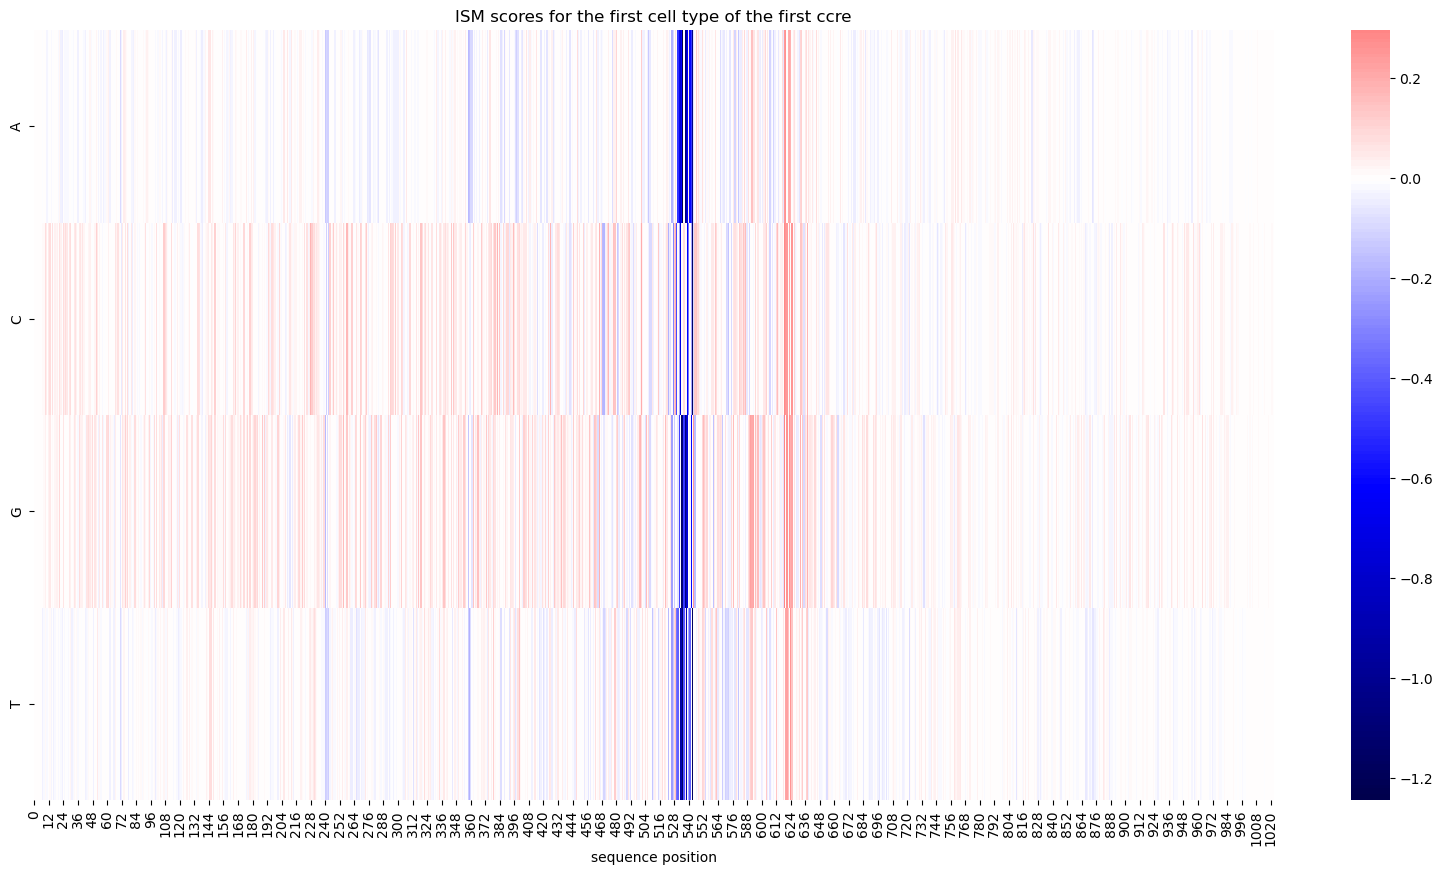

In [4]:
#the dimensions are all 4 nucleotides, the sequence, and all 161 cell types
#let's plot it for the first cell type
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre1[:,:,0], cmap = 'seismic', center = 0)
plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
plt.xlabel('sequence position')
plt.title('ISM scores for the first cell type of the first ccre')

Text(0.5, 1.0, 'ISM scores for the first cell type of the first ccre')

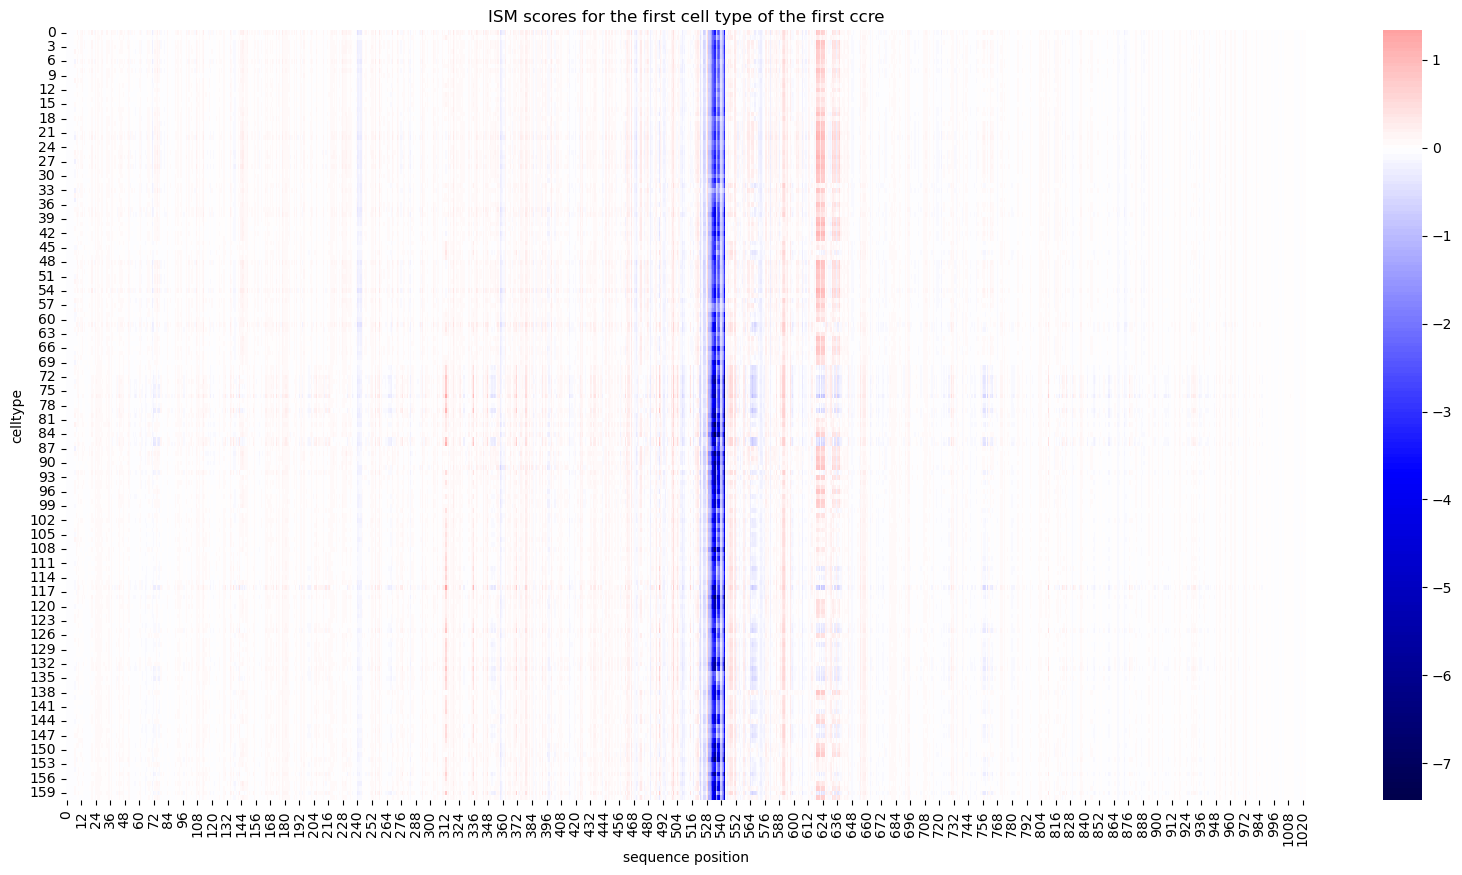

In [7]:
#now sum across the first dimension, then do a heatmap
ccre1_sum = ccre1.sum(axis = 0)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre1_sum.T, cmap = 'seismic', center = 0)
# plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the first cell type of the first ccre')

In [8]:
#now let's do the logo plot
#we also need to use utils from shap_analysis in order to get the dataset so that we can get the sequence
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)

In [11]:
a,b = util.dataset[0]
print(seq:=util.dataset.tokenizer.decode(a))

SUVWXYZGAAGGTAGAGAATCTGGTGGGGAAGCAAGCAAATGCCCATCACATGCACTTTCCTCCAACAGAGCGACTCAGATGCTATAAAACTTGCTAACACAGTCTCAGGGTCTGATCACAGTAACATACAATCCAGGTTTTAATCATCAGAAATCACAGTCCTATTGTCTTCTGCACAGACCCAAACACACTTGGAGGTCATGTTCAATATGAATACCTCACAGAGAAGGAAATTTACACGCGAGAAGTACATCTGCAGAAAGCCAGCTGGCATGTCAACCATTCAAAAACTCAGGGTGTTCTGGATAAAGAAGACTCAGGAAGACAAGTATGAAGCATAATCTGTGACATTCCATGCGGCAGACATTAGACACATACAAGAGAGTTGTTGGAAAGCGGAATTTATCTTCATATAAACAACACTGAGCTAAATCTCAATATTTCAGATCTCTAGAACTATCCATCAGTGAAATGGATTGCAAATACAAAGAGTAATACCATGTCACTTAAGAATAGAATCATGGACGAGGCTGCCACCTGCTGTTGGGGGCCACTGCAGAAGAAATTCCAGAACACTGGACTGGAGAGCACCTCACTTTCCTTACAGCTCTAAGTTTCTGACTCAGTGACCTGATTCACTACCATATACACAAAGACCCACTTACACAAATGACTGTTCTTCACACTAGGCCCATGGAGACAGGGATAAAATTCTGAATTTGCTCAGATACCTTCTCCGCTACTGACATCTAGGCATTACACAATTCATCTCTTCATATTTAACCTTTGAAGTTTGCTACTTCTCAGAGAGACTAATGAGTAGTGAGCAAATATCCTGAAGCTGAGAATGCTTCTACCTCCTCTCAAAACAACGGAATATTCATCAAAACACAGCAGTTCTGCACTTAACTTTAGGCCTTTTCTAACACCTTGTTTCTTGGCAGTAACTGTGGCCAGAATAGCTCTTTCCACAGATAAAGGACCTTTTGAAAGGATAGG

In [12]:
ccre1_sum.shape

(1023, 161)

<Axes: >

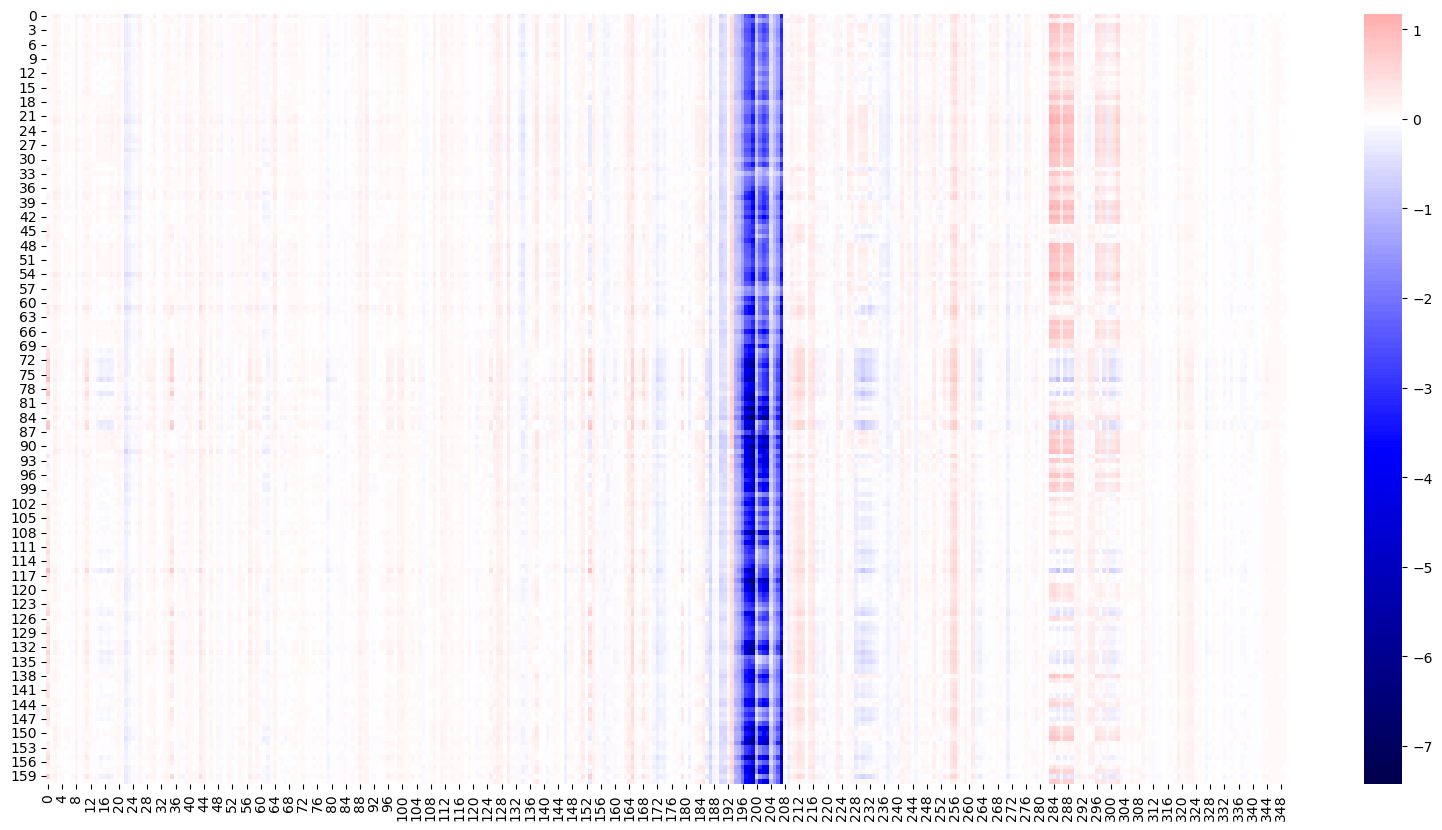

In [14]:
#let's now plot the middle 35-
fig, ax = plt.subplots(1,1, figsize = (20,10))
middle = ccre1_sum.shape[0]//2
#now go 50 to the left and to the right
sns.heatmap(ccre1_sum[middle-175:middle+175].T, cmap = 'seismic', center = 0)

In [15]:
#predicted and acual
print(b)
temp,_ = util.backbone(a.unsqueeze(0))
out = util.decoder(temp)
print(out)

tensor([-10.])
tensor([[-0.2317]], grad_fn=<AddmmBackward0>)


In [17]:
temp_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
print(temp_embed.shape)

torch.Size([1, 1023, 128])


In [18]:
out = util.model(temp_embed)
print(out)

tensor([[-0.2317]], grad_fn=<AddmmBackward0>)


In [19]:
#now we will work on the logo plot

#let's define the sequence
cut_seq = seq[middle-175:middle+175]
cut_seq

'GCATAATCTGTGACATTCCATGCGGCAGACATTAGACACATACAAGAGAGTTGTTGGAAAGCGGAATTTATCTTCATATAAACAACACTGAGCTAAATCTCAATATTTCAGATCTCTAGAACTATCCATCAGTGAAATGGATTGCAAATACAAAGAGTAATACCATGTCACTTAAGAATAGAATCATGGACGAGGCTGCCACCTGCTGTTGGGGGCCACTGCAGAAGAAATTCCAGAACACTGGACTGGAGAGCACCTCACTTTCCTTACAGCTCTAAGTTTCTGACTCAGTGACCTGATTCACTACCATATACACAAAGACCCACTTACACAAATGACTGTTCTTCACA'

In [20]:
#now we have our sequence, we can create our logo plot
#the heights will be the mean of the ISM scores
heights = np.mean(ccre1_sum[middle-175:middle+175], axis = 1)
print(heights.shape)

(350,)


Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.18586013202341448' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.03269146952014532' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1381645467803345' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.07265377535212854' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


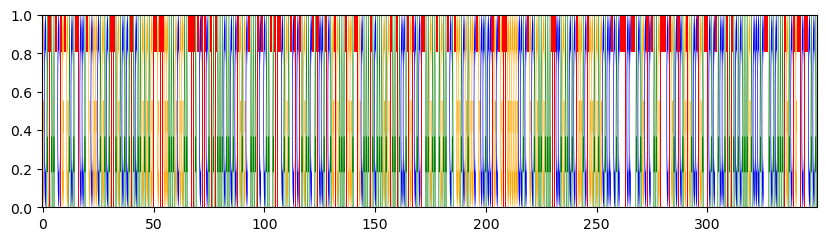

In [21]:
import pandas as pd
import logomaker
import numpy as np

# Example sequence and corresponding heights
# cut_seq = "ATCG"
# heights = np.array([1, 2, 1.5, 0.5])

# Initialize an empty DataFrame
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)))

# Fill the DataFrame with heights
for i, symbol in enumerate(cut_seq):
    logo_df.loc[i, symbol] = heights[i]

# Since logomaker expects a frequency, you might want to normalize the heights if they're not already
# This step is optional and depends on how you want the logo to represent the heights
logo_df = logo_df.div(logo_df.sum(axis=1), axis=0)

# Generate the sequence logo
logomaker.Logo(logo_df, color_scheme='classic')


<Axes: >

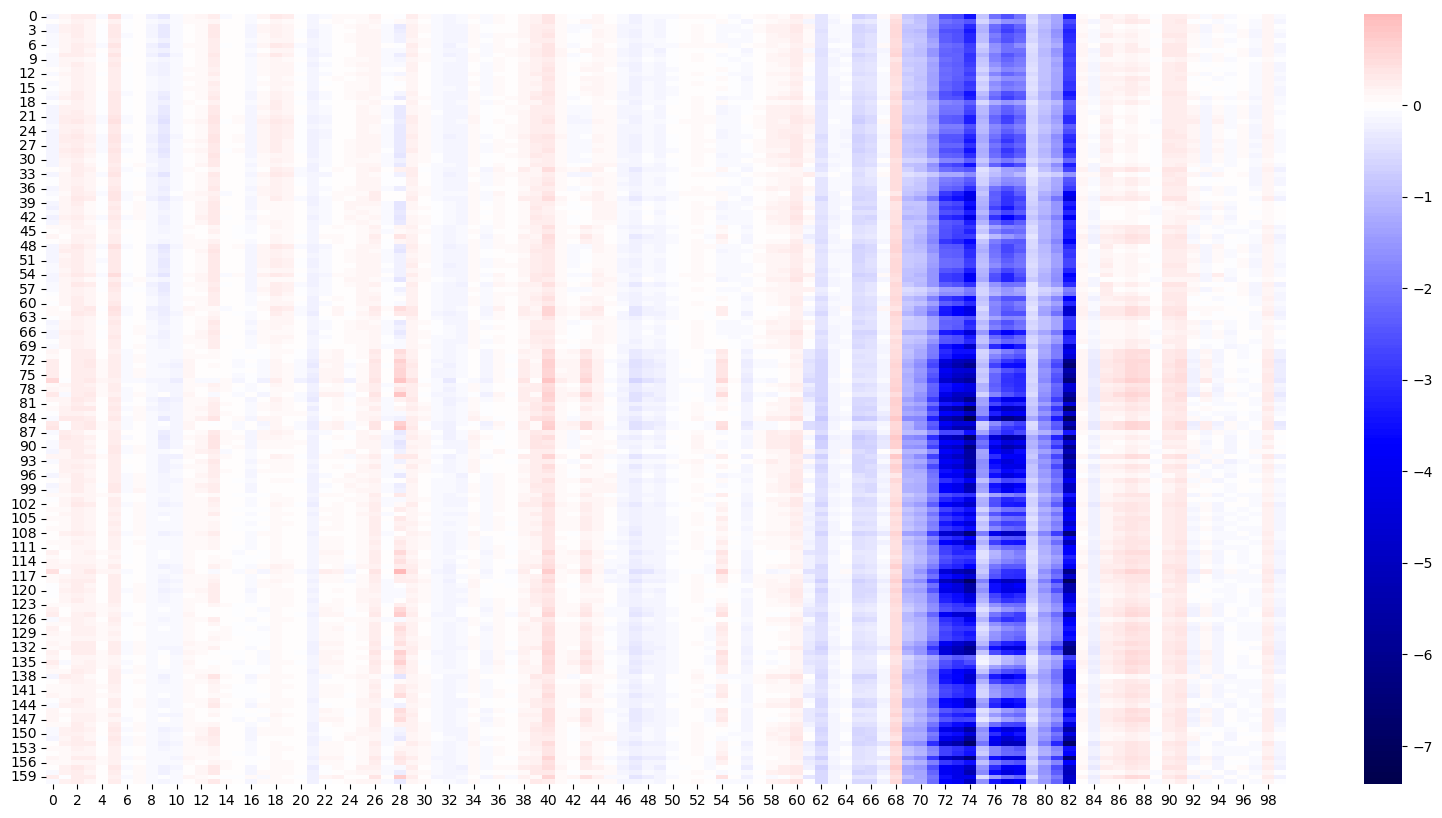

In [23]:
#let's redefine cut_seq and heights
cut_seq = seq[middle-50:middle+50]
heights = np.mean(ccre1_sum[middle-50:middle+50], axis = 1)
#and plot
#let's now plot the middle 35-
fig, ax = plt.subplots(1,1, figsize = (20,10))
middle = ccre1_sum.shape[0]//2
#now go 50 to the left and to the right
sns.heatmap(ccre1_sum[middle-50:middle+50].T, cmap = 'seismic', center = 0)

In [28]:
np.abs(heights)

array([5.05562071e-03, 1.15734459e-01, 2.10126238e-01, 1.67534191e-01,
       6.78936748e-04, 2.50579545e-01, 5.50329404e-02, 2.78581055e-02,
       1.18901578e-01, 1.87959424e-01, 1.14760613e-01, 5.51977768e-02,
       7.11821724e-02, 1.98581427e-01, 1.21470280e-02, 9.57340622e-03,
       9.63730460e-02, 3.00654760e-02, 1.29279708e-01, 8.36793665e-02,
       1.82167512e-02, 1.98468064e-01, 8.32995310e-03, 5.18560563e-02,
       1.57349977e-02, 9.71196243e-02, 1.83932367e-01, 5.38713437e-02,
       4.06904217e-02, 1.86028746e-01, 4.11673148e-02, 8.71565006e-02,
       1.51630806e-01, 1.21132384e-01, 5.79599942e-02, 8.34382367e-02,
       4.87345348e-02, 6.41027315e-04, 1.37877206e-01, 2.05258209e-01,
       3.85804441e-01, 7.42775141e-02, 9.71343391e-04, 1.41373462e-01,
       1.18564651e-01, 1.41065184e-02, 1.38399998e-01, 2.54924102e-01,
       1.40569226e-01, 1.66131371e-01, 5.75469588e-02, 3.72616720e-03,
       4.69754841e-02, 2.25737392e-02, 7.96909646e-02, 3.90697024e-02,
      

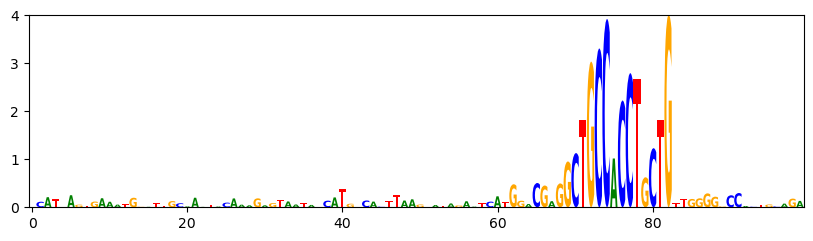

In [29]:
#now a logo plot
import pandas as pd
import logomaker
import numpy as np

# Example sequence (ensure it's a string or a list of characters)
# cut_seq = "ATCG"
# # Example heights (ensure this is a floating-point NumPy array)
# heights = np.array([1.0, 2.0, 1.5, 0.5], dtype=float)

# Initialize an empty DataFrame with the right data types
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq):
    logo_df.loc[i, symbol] = np.abs(heights)[i]

# Normalize if needed (optional, based on your requirements)
# logo_df = logo_df.div(logo_df.sum(axis=1), axis=0)

# Generate the sequence logo
logomaker.Logo(logo_df, color_scheme='classic')


<Figure size 2000x300 with 0 Axes>

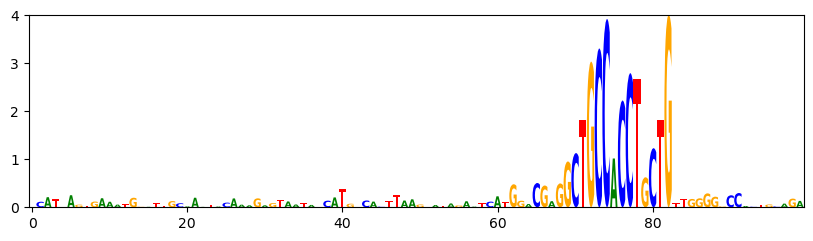

In [31]:
plt.figure(figsize=(20, 3))  # Adjust the width (10) and height (3) as needed
logomaker.Logo(logo_df, color_scheme='classic')


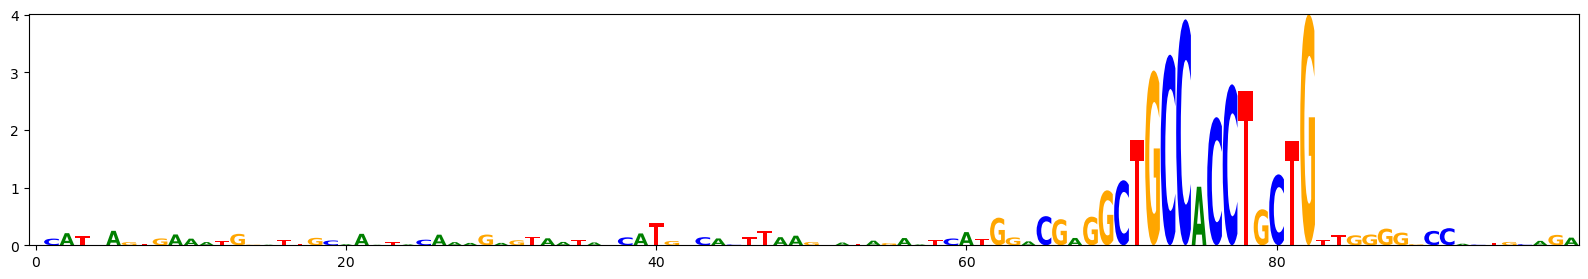

In [33]:
logo = logomaker.Logo(logo_df, color_scheme='classic')

# Get the figure from the axis object and adjust its size
fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

In [36]:
#compare this to the one that is all ccres
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
util_all = ShapUtils('DNase_allcelltypes', all_ckpt_path, percentage_background = 1/30000)

In [37]:
#now let's find the output and predicted
a,b = util_all.dataset[0]
print(b[0])

tensor(-10.)


Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/torch/csrc/utils/tensor_new.cpp:261.)


In [42]:
#and now we predict
temp,_ = util_all.backbone(a.unsqueeze(0))
out = util_all.decoder(temp)
print(out[0,0])

tensor(-1.7162, grad_fn=<SelectBackward0>)


In [43]:
#and now laod and plot
ccre1_all = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes0.npy')

Text(0.5, 1.0, 'ISM scores for the first cell type of the first ccre, multitasking model')

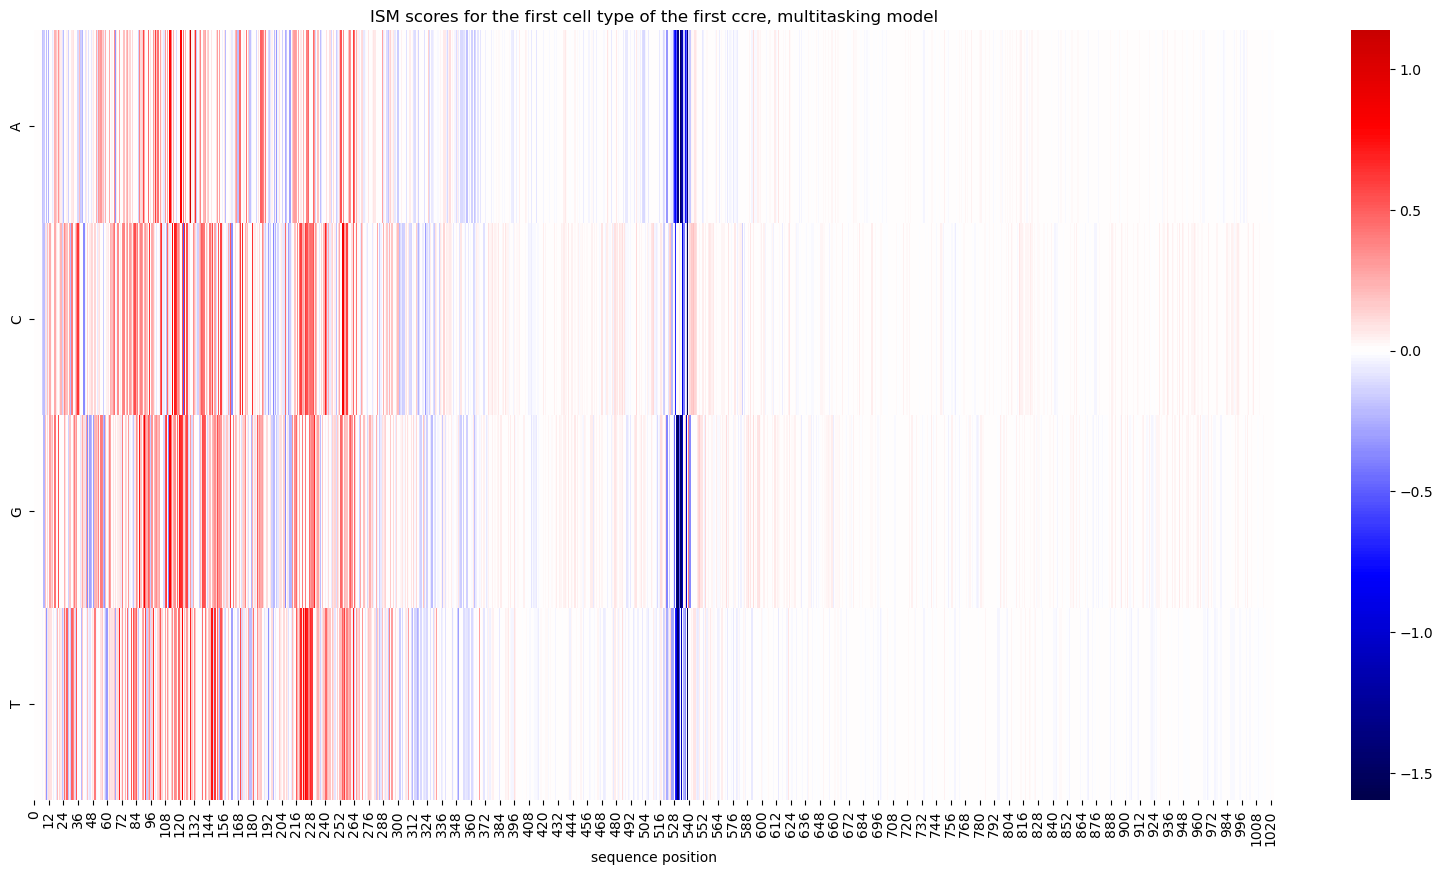

In [45]:
#now plot
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre1_all[:,:,0], cmap = 'seismic', center = 0)
plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
plt.xlabel('sequence position')
plt.title('ISM scores for the first cell type of the first ccre, multitasking model')


Text(0.5, 1.0, 'ISM scores for the first cell type of the first ccre, multitasking model')

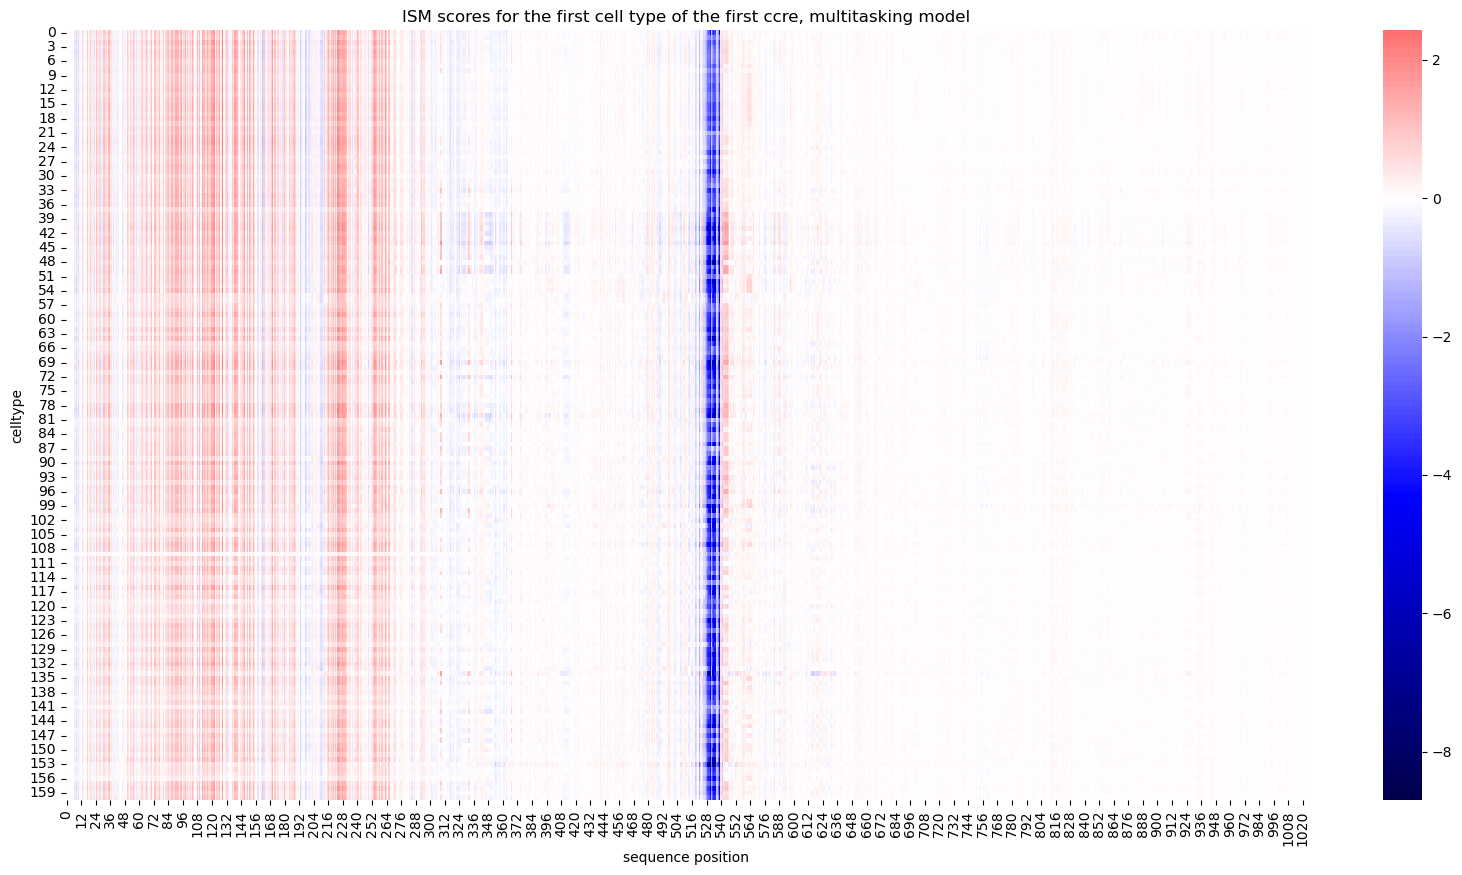

In [46]:
#and now the sum plot
ccre1_all_sum = ccre1_all.sum(axis = 0)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre1_all_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the first cell type of the first ccre, multitasking model')

In [47]:
#get the sequence
print(a)

tensor([ 9,  9, 10,  ...,  8, 10,  8])


In [48]:
seq_all = util_all.dataset.tokenizer.decode(a)

In [51]:
# and now a logo plot
cut_seq_all = seq_all[middle-50:middle+50]
len(cut_seq_all)

100

In [52]:
heights_all = np.mean(ccre1_all_sum[middle-50:middle+50], axis = 1)
print(heights_all.shape)

(100,)


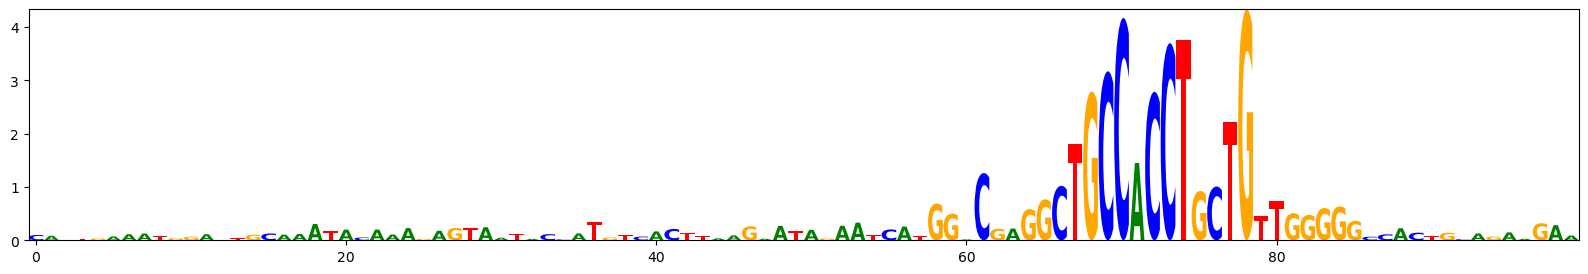

In [54]:
#and now a logo plot
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq_all)), columns=list(set(cut_seq_all)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq_all):
    logo_df.loc[i, symbol] = np.abs(heights_all)[i]

# Normalize if needed (optional, based on your requirements)
# logo_df = logo_df.div(logo_df.sum(axis=1), axis=0)

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

# make a workflow to easily produce these plots given the indices, can later add to the utils

In [58]:
#first plotting the data can be made into a utility, can just define a list of them

#let's plot the second celltype as well, and compare it

#first let's do it alll manually one more time
ccre2 = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_1.npy') #should be ccre2 all celltypes
# print(ccre2.shape)
#now look at predicted and actual output
a,b = util.dataset[161] #we do it for the second ccre first celltype
seq=util.dataset.tokenizer.decode(a)
temp,_ = util.backbone(a.unsqueeze(0))
out = util.decoder(temp)
print(b,out) #very decent prediction here

tensor([-2.4038]) tensor([[-2.2100]], grad_fn=<AddmmBackward0>)


Text(0.5, 1.0, 'ISM scores for the second cell type of the first ccre second celltype')

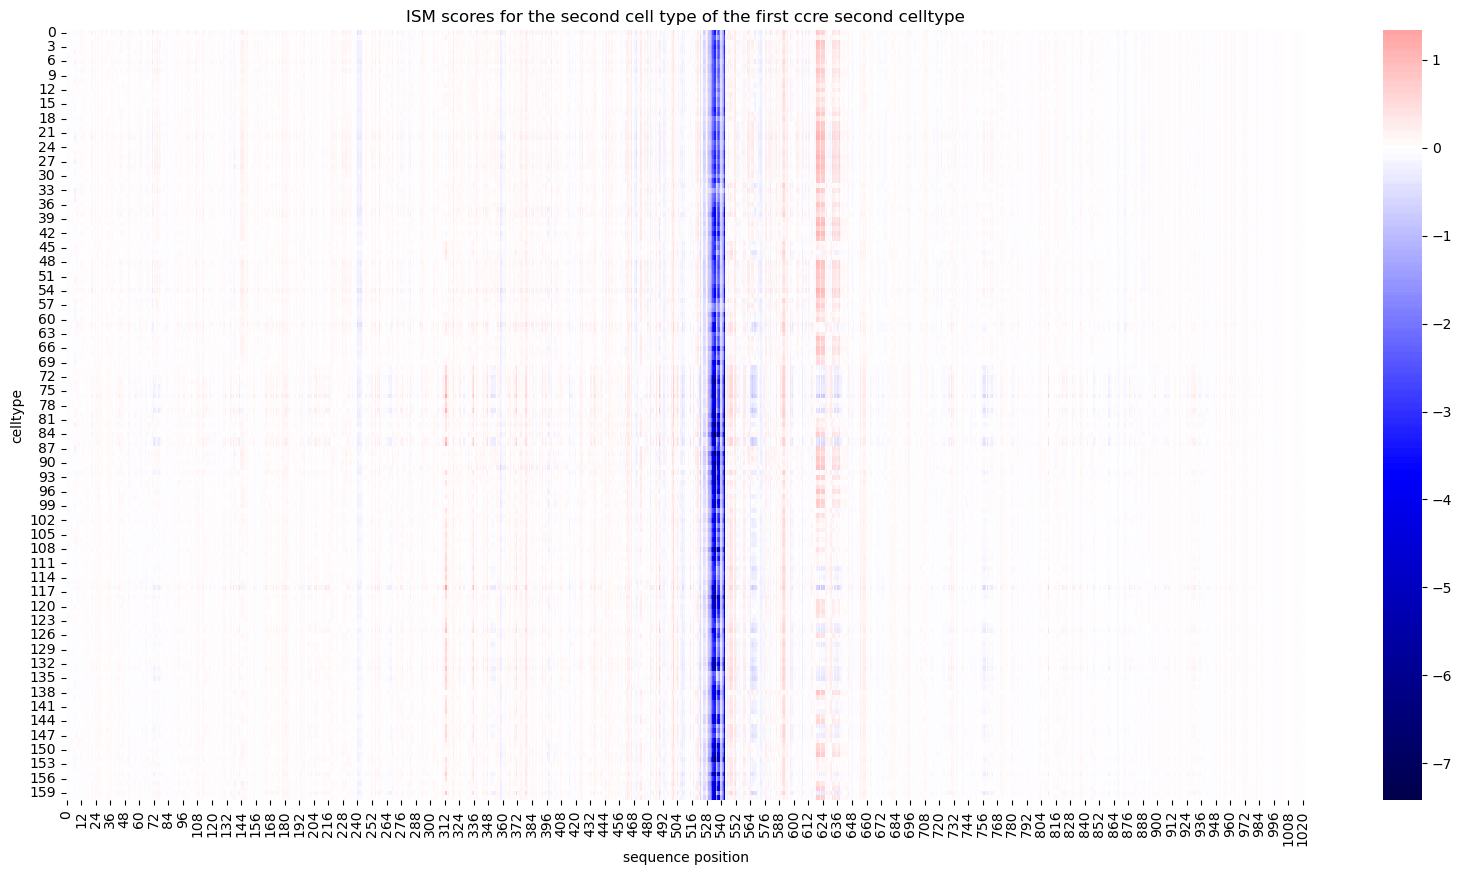

In [59]:
#now sum across the first dimension, then do a heatmap
ccre2_sum = ccre2.sum(axis = 0)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre2_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the second cell type of the first ccre second celltype')
#same type of focus, makes sense!

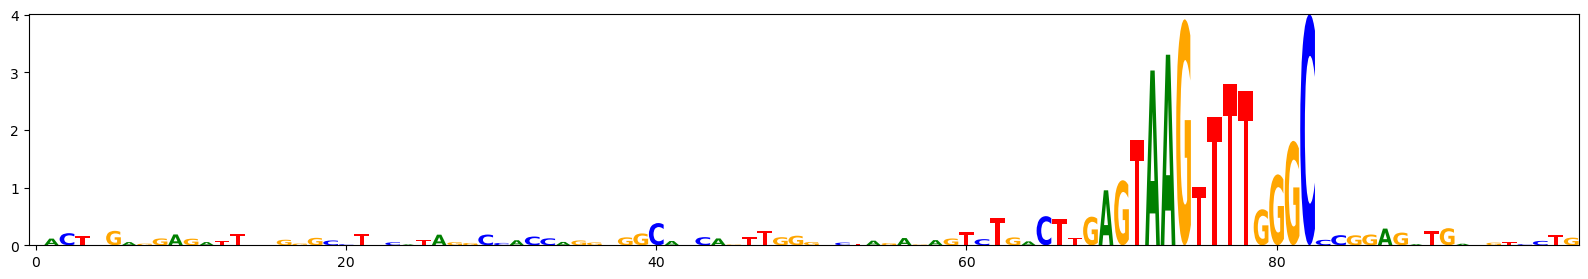

In [60]:
#now we do the logo plot
cut_seq = seq[middle-50:middle+50]
heights = np.mean(ccre2_sum[middle-50:middle+50], axis = 1)
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq):
    logo_df.loc[i, symbol] = np.abs(heights)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

Text(0.5, 80.7222222222222, 'sequence position')

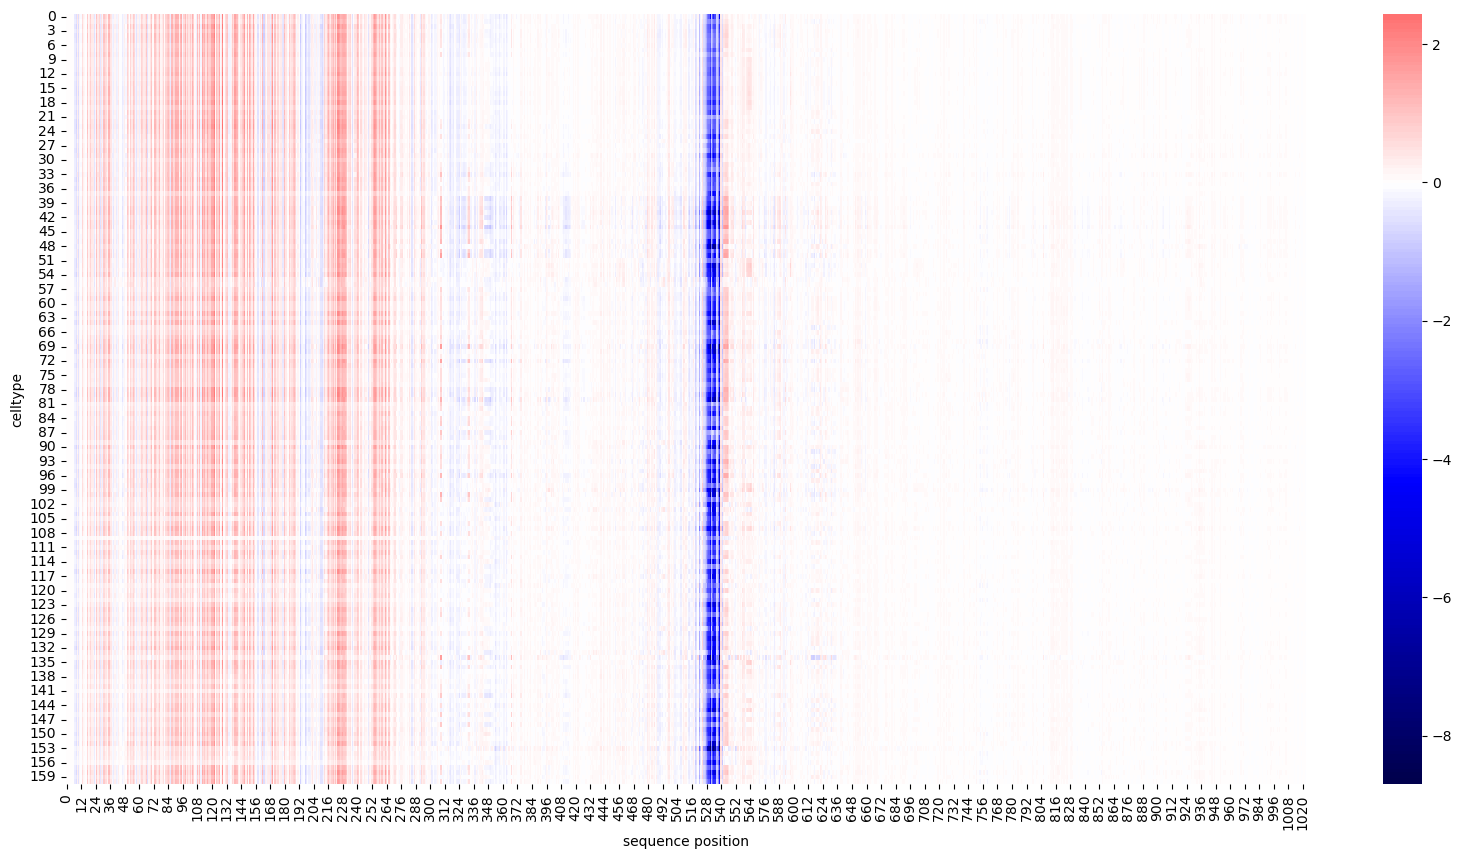

In [61]:
#now we repeat with the allcelltypes model
ccre2_all = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes1.npy') #should be ccre2 all celltypes
#now sum across the first dimension, then do a heatmap
ccre2_all_sum = ccre2_all.sum(axis = 0)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre2_all_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')

In [63]:
#load in seq
a,b = util_all.dataset[1]
seq_all = util_all.dataset.tokenizer.decode(a)


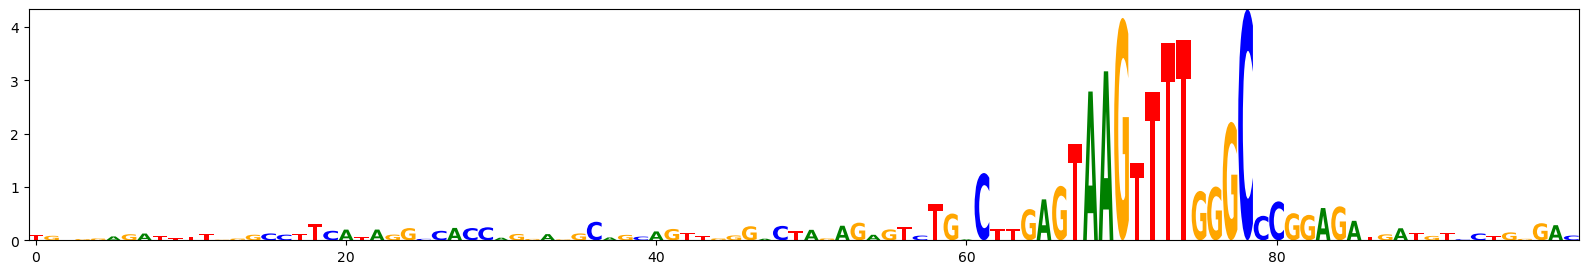

In [64]:
#now we do the logo plot
cut_seq_all = seq_all[middle-50:middle+50]
heights_all = np.mean(ccre2_all_sum[middle-50:middle+50], axis = 1)
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq_all)), columns=list(set(cut_seq_all)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq_all):
    logo_df.loc[i, symbol] = np.abs(heights_all)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

0.0


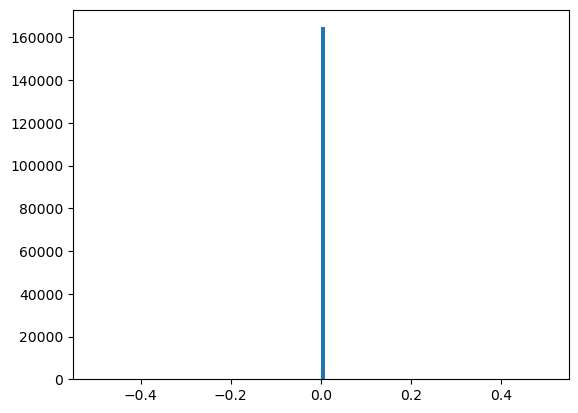

In [67]:
# compare ccre1_all_sum and ccre2_all_sum
plt.hist((ccre1_all_sum-ccre2_all_sum).flatten(), bins = 100)
print(np.max(np.abs(ccre1_all_sum-ccre2_all_sum)))

In [68]:
#load them in to compare
ccre1_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes0.npy').sum(axis = 0)
ccre2_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes1.npy').sum(axis = 0)
ccre3_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes2.npy').sum(axis = 0)

#now print the ifferences
print(np.max(np.abs(ccre1_all_sum-ccre2_all_sum)))
print(np.max(np.abs(ccre1_all_sum-ccre3_all_sum)))

0.0
0.0


In [69]:
#try loading in a really late one
ccre1_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes99.npy').sum(axis = 0)
print(np.max(np.abs(ccre1_all_sum-ccre2_all_sum)))

#they are all completely identical???

0.0


In [70]:
#compare the non all one too
ccre1_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_0.npy').sum(axis = 0)
ccre2_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_1.npy').sum(axis = 0)
print(np.max(np.abs(ccre1_sum-ccre2_sum)))

0.0


# redo the plots

In [2]:
#first test the differences
import numpy as np
ccre1_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes0.npy').sum(axis = 0)
ccre2_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes1.npy').sum(axis = 0)
ccre3_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes2.npy').sum(axis = 0)

#now print the ifferences
print(np.max(np.abs(ccre1_all_sum-ccre2_all_sum)))
print(np.max(np.abs(ccre1_all_sum-ccre3_all_sum)))

ccre1_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_0.npy').sum(axis = 0)
ccre2_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_1.npy').sum(axis = 0)
print(np.max(np.abs(ccre1_sum-ccre2_sum)))

10.75232481956482
9.080270111560822
7.411407709121704


In [9]:
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
from shap_analysis.shap_utils import ShapUtils
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)


In [15]:
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
util_all = ShapUtils('DNase_allcelltypes', all_ckpt_path, percentage_background = 1/30000)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'ISM scores for the second ccre')

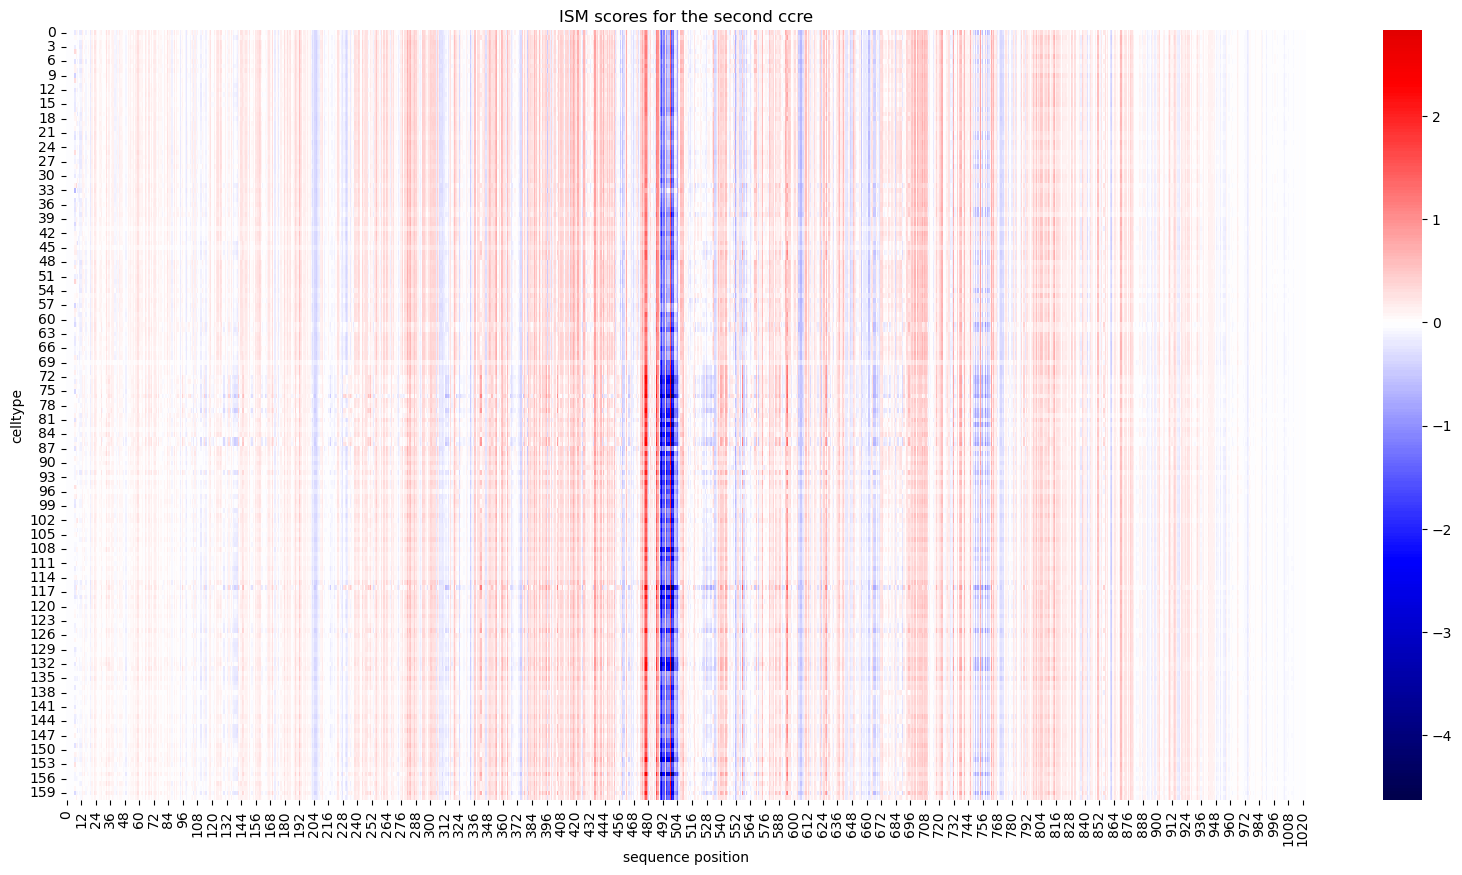

In [5]:
#now plot second ccre
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre2_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the second ccre')

In [10]:
#get seq
a,b = util.dataset[161]
seq=util.dataset.tokenizer.decode(a)
#and predict vs output
temp,_ = util.backbone(a.unsqueeze(0))
out = util.decoder(temp)
print(b,out)


tensor([-2.4038]) tensor([[-2.2100]], grad_fn=<AddmmBackward0>)


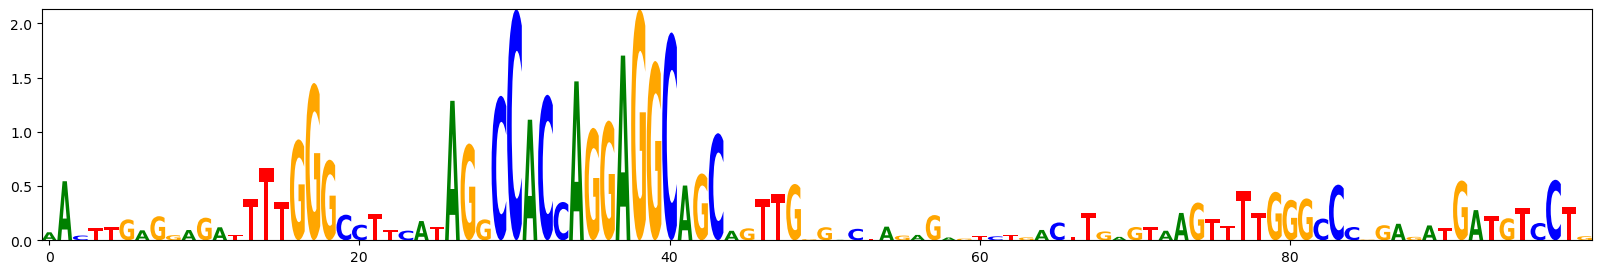

In [14]:
# and logo plot
import logomaker
import pandas as pd
middle = ccre2_sum.shape[0]//2
cut_seq = seq[middle-50:middle+50]
heights = np.mean(ccre2_sum[middle-50:middle+50], axis = 1)
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq):
    logo_df.loc[i, symbol] = np.abs(heights)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

Text(0.5, 1.0, 'ISM scores for the second ccre, multitasking model')

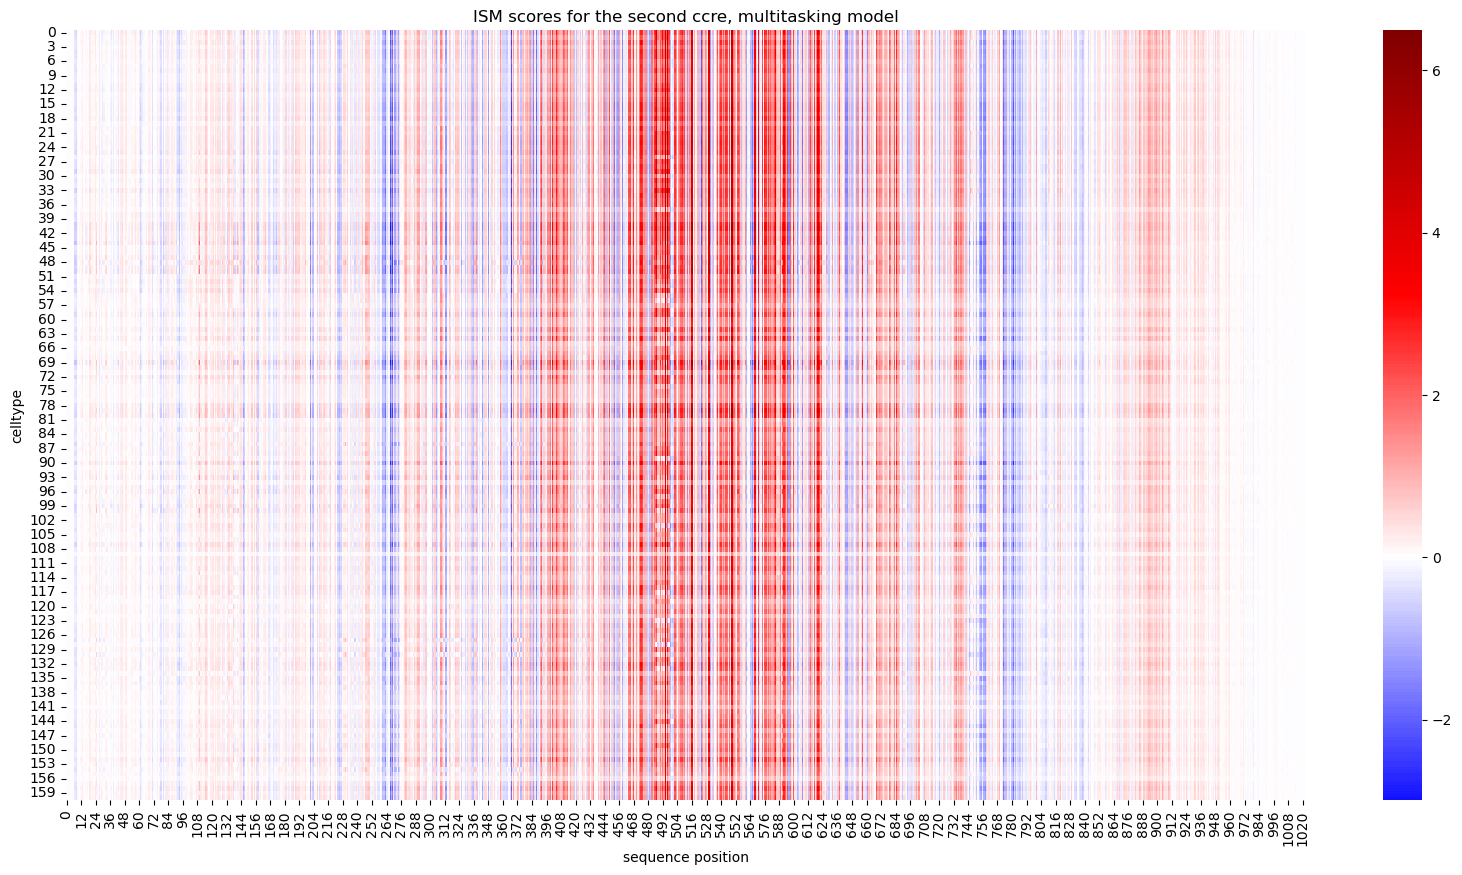

In [17]:
#and the allcelltypes
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre2_all_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the second ccre, multitasking model')

In [20]:
#and now actual vs predicted
a,b = util_all.dataset[1]
seq_all = util_all.dataset.tokenizer.decode(a)
temp,_ = util_all.backbone(a.unsqueeze(0))
out = util_all.decoder(temp)
print(b[0],out[0,0]) #much worse prediction!
#biased in the right direction, but in general, the things that change it are much worse!! Impacted by wrong things

tensor(-2.4038) tensor(-4.6283, grad_fn=<SelectBackward0>)


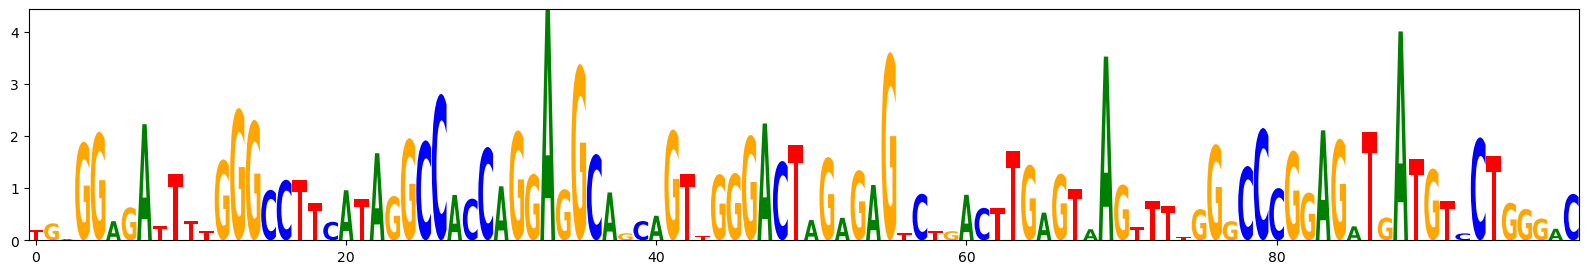

In [21]:
#and let's plot the logo
middle = ccre2_all_sum.shape[0]//2
cut_seq_all = seq_all[middle-50:middle+50]
heights_all = np.mean(ccre2_all_sum[middle-50:middle+50], axis = 1)

logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq_all)), columns=list(set(cut_seq_all)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq_all):
    logo_df.loc[i, symbol] = np.abs(heights_all)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

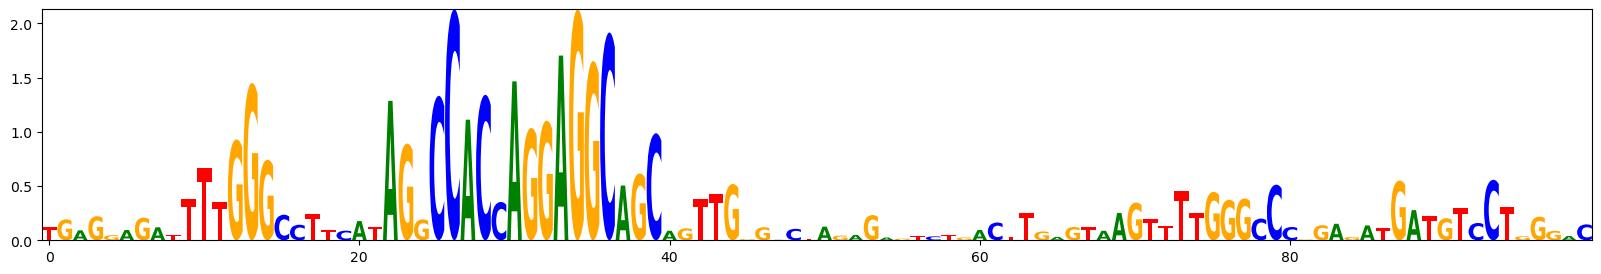

In [23]:
#let's quickly fix the shift
#basically just need to add 4 to the left and subtract 4 from the right
cut_seq = seq[middle-50+4:middle+50+4]
heights = np.mean(ccre2_sum[middle-50+4:middle+50+4], axis = 1)
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq):
    logo_df.loc[i, symbol] = np.abs(heights)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

# and do for the third ccre

Text(0.5, 1.0, 'ISM scores for the third ccre')

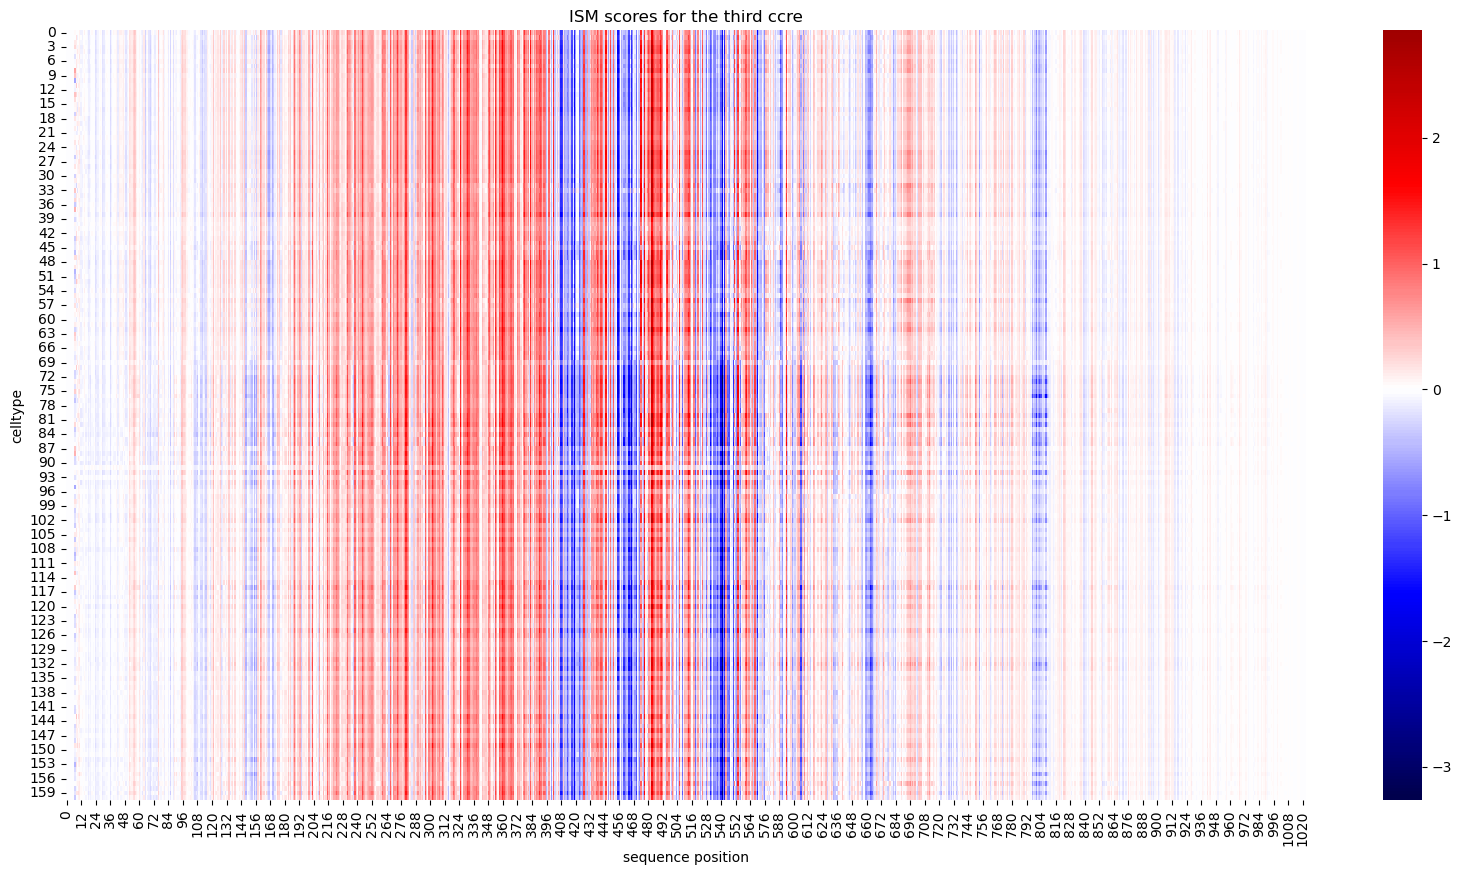

In [25]:
ccre3_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_2.npy').sum(axis = 0)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre3_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the third ccre')

In [26]:
a,b = util.dataset[161*2]
seq=util.dataset.tokenizer.decode(a)
#and predict vs output
temp,_ = util.backbone(a.unsqueeze(0))
out = util.decoder(temp)
print(b,out)

tensor([1.8475]) tensor([[-0.8663]], grad_fn=<AddmmBackward0>)


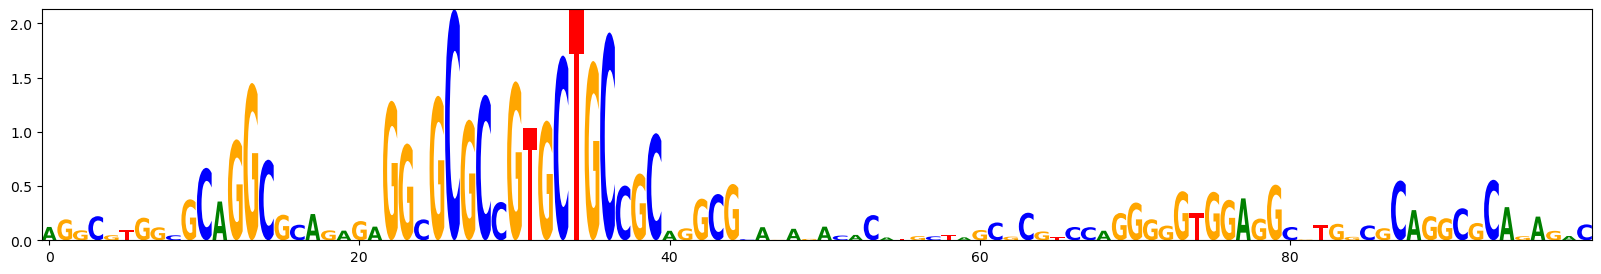

In [27]:
# middle = ccre2_sum.shape[0]//2
cut_seq = seq[middle-50+4:middle+50+4]
heights = np.mean(ccre2_sum[middle-50+4:middle+50+4], axis = 1)
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq):
    logo_df.loc[i, symbol] = np.abs(heights)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here

# Show the plot with adjusted size
fig.show()

Text(0.5, 1.0, 'ISM scores for the third ccre, multitasking')

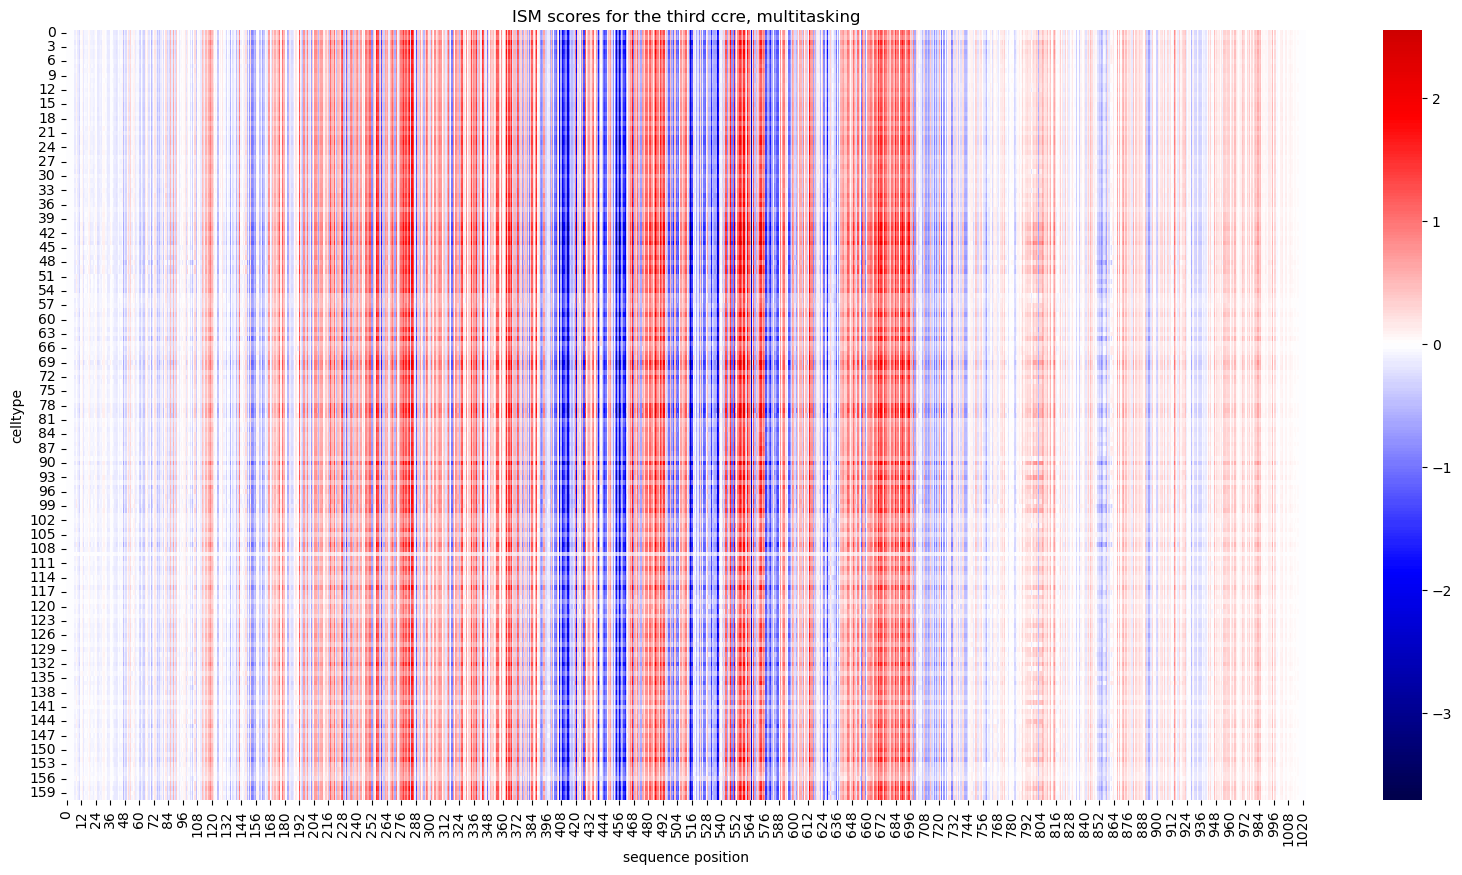

In [29]:
#and multitasking model
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre3_all_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the third ccre, multitasking')

In [30]:
#and now actual vs predicted
a,b = util_all.dataset[2]
seq_all = util_all.dataset.tokenizer.decode(a)
temp,_ = util_all.backbone(a.unsqueeze(0))
out = util_all.decoder(temp)
print(b[0],out[0,0]) #much worse prediction!

tensor(1.8475) tensor(-1.2936, grad_fn=<SelectBackward0>)


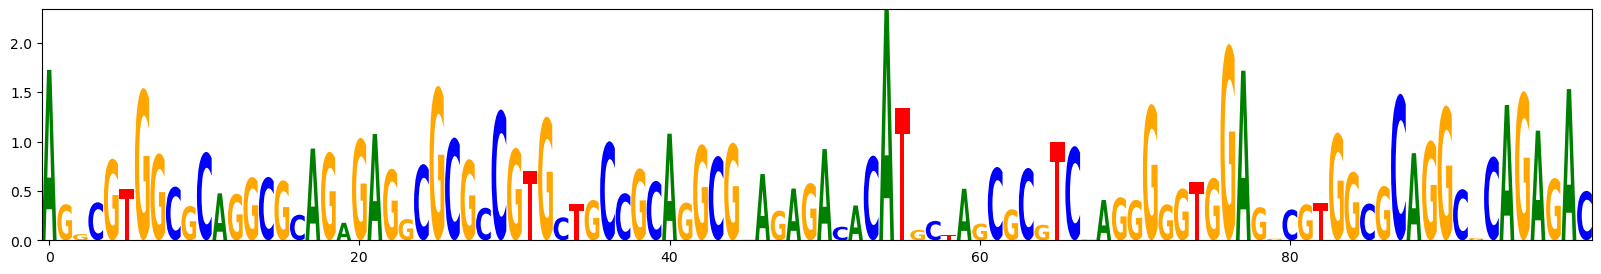

In [31]:
#and logo plot
middle = ccre3_all_sum.shape[0]//2
cut_seq_all = seq_all[middle-50:middle+50]
heights_all = np.mean(ccre3_all_sum[middle-50:middle+50], axis = 1)

logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq_all)), columns=list(set(cut_seq_all)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq_all):
    logo_df.loc[i, symbol] = np.abs(heights_all)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here
fig.show()

# make general framework, part of the utils

In [34]:
#first we make a function that can get the dataset, it's based on the model type
#then it can use the sequence to plot that one sumary plot and then
#maybe later make it for individual cell types, but that's kind of hard to do, for now this is fine.
#also, we can make a separate utils, in shap_analysis make an ism_utils.py file which copies much of the boilerplate and function
#but removes any reference to shap and adds utilities for these type sof plots
#separate function for each ploto type, then we can call them one by one, allow me to add a title as well, or at least part of the title like cccre number

#also we need a way to make sure see the same sequences!so for the cell type specific won't be exactly middle 100 but maybe middle-43:middle+57 or something
#play around with it and figure it out, maybe only off by one nucleotide? No it's off by 4, we see 4 shifted to the left compared to multitask
#we fixed that

# Also add a way to calculate the ISM values.

a,b = util.dataset[2]
seq_all = util.dataset.tokenizer.decode(a)
temp,_ = util.backbone(a.unsqueeze(0))
out = util.decoder(temp)
out.shape #it's 1x1

torch.Size([1, 1])

In [37]:
out.item()

0.5474454164505005

In [2]:
from shap_analysis.shap_utils import ShapUtils
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
# EH38D4327560

NameError: name 'ckpt_path' is not defined

In [ ]:
util.dataset.array

In [ ]:
#find 

# ISM utils

Mostly written, need to finish it, then we can find and plot one of the enhancers

In [1]:
#we will create a utility function for shap called shap_utils.py
#you define several attributes, and then it will load the data to be able to access the shap values

import torch 
import sys
import yaml 
sys.path.append('/data/leslie/sarthak/hyena/hyena-dna/')
from src.tasks.decoders import SequenceDecoder
from src.models.sequence.dna_embedding import DNAEmbeddingModel
from src.dataloaders.datasets.hg38_char_tokenizer import CharacterTokenizer
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class ISMUtils():
    def __init__(self, model_type, ckpt_path, cfg = None, split = 'train', filter=True):
        type_list = ['ccre', 'DNase_ctst', 'DNase_allcelltypes', 'DNase']
        if model_type not in type_list:
            raise ValueError('Model type not recognized')
        self.mtype = model_type
        
        #check to see the type, and then load the right tokenizer, class and cfg
        if self.mtype == 'DNase':
            from src.dataloaders.datasets.DNase_dataset import DNaseDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase.yaml'
                
        elif self.mtype == 'DNase_allcelltypes':
            from src.dataloaders.datasets.DNase_allcelltypes import DNaseAllCellTypeDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase_allcelltypes.yaml'

        elif self.mtype == 'Dnase_ctst':
            from src.dataloaders.datasets.DNase_ctst_dataset import DNaseCtstDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase_ctst.yaml'

        else:
            raise ValueError('Model type not recognized')

        #now we load the model and dataset

        # self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.dataset = DatasetClass(max_length = 1024, split = split, tokenizer=self.tokenizer, rc_aug = False, tokenizer_name='char', add_eos='True', filter = filter)
        cfg = yaml.load(open(cfg, 'r'), Loader=yaml.FullLoader)
        
        train_cfg = cfg['train']  # grab section `train` section of config
        model_cfg = cfg['model_config']  # grab the `model` section of config
        d_output = train_cfg['d_output']
        backbone = DNAEmbeddingModel(**model_cfg)
        # backbone_skip = DNAEmbeddingModel(skip_embedding=True, **model_cfg)
        decoder = SequenceDecoder(model_cfg['d_model'], d_output=d_output, l_output=0, mode='pool')
        state_dict = torch.load(ckpt_path, map_location='cpu')  # has both backbone and decoder
        
        # loads model from ddp by removing prexix to single if necessary
        torch.nn.modules.utils.consume_prefix_in_state_dict_if_present(
            state_dict["state_dict"], "model."
        )

        model_state_dict = state_dict["state_dict"]

        # need to remove torchmetrics. to remove keys, need to convert to list first
        for key in list(model_state_dict.keys()):
            if "torchmetrics" in key:
                model_state_dict.pop(key)

        # the state_dict keys slightly mismatch from Lightning..., so we fix it here
        decoder_state_dict = {}
        decoder_state_dict['output_transform.weight'] = model_state_dict.pop('decoder.0.output_transform.weight')
        decoder_state_dict['output_transform.bias'] = model_state_dict.pop('decoder.0.output_transform.bias')

        #now adjust the backbone if needed
        if self.mtype == 'DNase':
            embedding1 = torch.nn.Embedding(20, 128)
            # embedding2 = torch.nn.Embedding(20, 128)
            backbone.backbone.embeddings.word_embeddings = embedding1 #again a hack
            # backbone_skip.backbone.embeddings.word_embeddings = embedding2 #again a hack

        # now actually load the state dict to the decoder and backbone separately
        decoder.load_state_dict(decoder_state_dict, strict=True)
        backbone.load_state_dict(model_state_dict, strict=True)

        self.backbone = backbone.eval()
        self.decoder = decoder.eval()

    def var(self, idx):
        # idx = idx * util.dataset.cell_types #takes into account the fact that we need to find ccre, but we're given cell type
        # seq_idx = int(idx/self.dataset.cell_types)
        #but we are given ccre id so it's easy
        seq_idx = idx
        cCRE_id = self.dataset.array[seq_idx][0] #get the id from the array
        row = self.dataset.cCRE_dict[cCRE_id]
        #now we can calculate the variance using this data
        # print(np.var(dnase_filtered[row,:])) #identical
        
        return np.var(self.dataset.cell_dnase_levels[row,:])

    def output(self,idx):
        #given the index, this finds the associated output (single value)
        a,b = self.dataset[idx]
        temp,_ = self.backbone(a.unsqueeze(0))
        out = self.decoder(temp)

        if self.mtype == 'DNase':
            print(f'predicted output: {out}, actual output: {b}')
            return b, out

        elif self.mtype == 'DNase_allcelltypes':
            print(f'predicted output: {out[0,0]}, actual output: {b[0]}')
            return b[0], out[0,0]

    def output_all(self,idx):
        #given the index, this finds the associated output (all values averaged across the cell types for a singel ccre)
        #if it's DNase, then we need to do it for all the cell types, here the input idx should be 161 times any number
        if self.mtype == 'DNase':
            #first check to make sure idx is divisible by 161
            if idx % 161 != 0:
                raise ValueError('Index not divisible by 161')
            out_list = []
            target_list = []
            for i in range(161):
                a,b = self.dataset[idx+i]
                temp,_ = self.backbone(a.unsqueeze(0))
                out = self.decoder(temp)
                out_list.append(out.item())
                target_list.append(b.item())
            out = np.mean(out_list)
            print(f'predicted output mean: {out}, actual output mean: {np.mean(target_list)}')
            #but return the whole lists
            return np.array(target_list), np.array(out_list)

        if self.mtype == 'DNase_allcelltypes':
            a,b = self.dataset[idx]
            temp,_ = self.backbone(a.unsqueeze(0))
            out = self.decoder(temp)
            print(f'predicted output mean: {torch.mean(out)}, actual output mean: {torch.mean(b)}')
            return b.detach().numpy(), out.detach().numpy()

    # def plot_singlecelltype(self, data, celltype = None):
    #     #given the index, this finds the associated output (single value)
    #     #we can either take in the actual data, or the ccre number
    #     if type(data) == int:
    #         data_loaded = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_{data}.npy')
    #         fig, ax = plt.subplots(1,1, figsize = (20,10))
    #         sns.heatmap(data_loaded[:,:,0], cmap = 'seismic', center = 0)
    #         plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
    #         plt.xlabel('sequence position')
    #         plt.title(f'ISM scores for the {celltype} cell type of the {data} ccre')
    #         plt.show()
            

    #     elif type(data) == np.ndarray:
    #         #this is the actual data

        #will do that later
    def find_ccre_type(idx):
        #this function will use the ccre id to find the specific type
        return None

In [3]:
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
util = ISMUtils('DNase', ckpt_path)

In [4]:
#now we can test the model and see what we need to do
#so basically when we call dataset[0:161] it's all from the same ccre, so let's find the id
a,b = util.dataset[0]
print(a[0:20])

tensor([12, 13, 14, 15, 16, 17, 18,  9,  7,  7,  9,  9, 10,  7,  9,  7,  9,  7,
         7, 10])


In [6]:
print(util.tokenizer.decode(a[0:20]))

SUVWXYZGAAGGTAGAGAAT


In [5]:
print(util.dataset.array[0])

['EH38D4327509' 1
 'GGTGAAGGTAGAGAATCTGGTGGGGAAGCAAGCAAATGCCCATCACATGCACTTTCCTCCAACAGAGCGACTCAGATGCTATAAAACTTGCTAACACAGTCTCAGGGTCTGATCACAGTAACATACAATCCAGGTTTTAATCATCAGAAATCACAGTCCTATTGTCTTCTGCACAGACCCAAACACACTTGGAGGTCATGTTCAATATGAATACCtcacagagaaggaaatttaCACGCGAGAAGTACATCTGCAGAAAGCCAGCTGGCATGTCAACCATTCAAAAACTCAGGGTGTTCTGGATAAAGAAGACTCAGGAAGACAAGTATGAAGCATAATCTGTGACATTCCATGCGGCAGACATTAGACACATACAAGAGAGTTGTTGGAAAGCGGaatttatcttcatataaacaACACTGAGCTAAATCTCAATATTTCAGATCTCTAGAACTATCCATCAGTGAAATGGATTGCAAATACAAAGAGTAATACCATGTCACTTAAGAATAGAATCATGGACGAGGCTGCCACCTGCTGTTGGGGGCCACTGCAGAAGAAATTCCAGAACACTGGACTGGAGAGCACCTCACTTTCCTTACAGCTCTAAGTTTCTGACTCAGTGACCTGATTCACTACCATATACACAAAGACCCACTTACACAAATGACTGTTCTTCACACTAGGCCCATGGAGACAGGGATAAAATTCTGAATTTGCTCAGATACCTTCTCCGCTACTGACATCTAGGCATTACACAATTCATCTCTTCATATTTAACCTTTGAAGTTTGCTACTTCTCAGAGAGACTAATGAGTAGTGAGCAAATATCCTGAagctgagaatgcttctacctCCTCTCAAAACAACGGAATATTCATCAAAACACAGCAGTTCTGCACTTAACTTTAGGCCTTTTCTAACACCTTGTTTCTTGGCAGTAACTGTGGCCAGAATAGCTCTTTCCACAGATAAAGGAC

In [7]:
int(0/161) #just verifying it's 0
#ohhhh, the difference is we get rid of some of the beginning ones, but we see that there's clear overlap once we skip the first 3!!
#so yes this is correct, and we can indeex just get the ccre id using this approach

0

In [8]:
ccre_id = util.dataset.array[0][0]
ccre_id

'EH38D4327509'

In [9]:
#we got it! now let's find where it is in the bed file
bed_file = '/data/leslie/sarthak/data/GRCh38-cCREs.bed'

In [11]:
#let's nowo load that file into a pandas array
import pandas as pd
df = pd.read_csv(bed_file, delimiter = '\t', header=None)
df.head()

0       1       2             3             4                         5
0  chr1  104896  105048  EH38D4327509  EH38E2776520      CTCF-only,CTCF-bound
1  chr1  138866  139134  EH38D4327520  EH38E2776521           pELS,CTCF-bound
2  chr1  181289  181639  EH38D4327525  EH38E2776524  DNase-H3K4me3,CTCF-bound
3  chr1  267925  268171  EH38D4327544  EH38E2776528      CTCF-only,CTCF-bound
4  chr1  586036  586264  EH38D4327554  EH38E2776532      CTCF-only,CTCF-bound

In [12]:
df.tail()

0         1         2             3             4  \
1063873  chrY  21252996  21253278  EH38D6144481  EH38E3951203   
1063874  chrY  21598449  21598656  EH38D6144550  EH38E3951229   
1063875  chrY  21839503  21839853  EH38D6144588  EH38E3951242   
1063876  chrY  26352857  26353207  EH38D4327371  EH38E3951251   
1063877  chrY  26353315  26353520  EH38D4327372  EH38E3951252   

                            5  
1063873                  dELS  
1063874  CTCF-only,CTCF-bound  
1063875                  dELS  
1063876                  pELS  
1063877                  pELS

In [13]:
#now turn it to a numpy array
bed_array = df.to_numpy()
bed_array.shape

(1063878, 6)

In [14]:
#exactly as we expect!
#and now we can find the ccre id
line = np.where(bed_array[:,3] == ccre_id)

In [18]:
print(line)
print(line[0][0]) #there we go, it is indeed the 0 index, and now we can easily get the type

(array([0]),)
0


In [22]:
#we will create a utility function for shap called shap_utils.py
#you define several attributes, and then it will load the data to be able to access the shap values

import torch 
import sys
import yaml 
sys.path.append('/data/leslie/sarthak/hyena/hyena-dna/')
from src.tasks.decoders import SequenceDecoder
from src.models.sequence.dna_embedding import DNAEmbeddingModel
from src.dataloaders.datasets.hg38_char_tokenizer import CharacterTokenizer
# import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class ISMUtils():
    def __init__(self, model_type, ckpt_path, cfg = None, split = 'train', filter=True):
        type_list = ['ccre', 'DNase_ctst', 'DNase_allcelltypes', 'DNase']
        if model_type not in type_list:
            raise ValueError('Model type not recognized')
        self.mtype = model_type
        
        #check to see the type, and then load the right tokenizer, class and cfg
        if self.mtype == 'DNase':
            from src.dataloaders.datasets.DNase_dataset import DNaseDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase.yaml'
                
        elif self.mtype == 'DNase_allcelltypes':
            from src.dataloaders.datasets.DNase_allcelltypes import DNaseAllCellTypeDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase_allcelltypes.yaml'

        elif self.mtype == 'Dnase_ctst':
            from src.dataloaders.datasets.DNase_ctst_dataset import DNaseCtstDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase_ctst.yaml'

        else:
            raise ValueError('Model type not recognized')

        #now we load the model and dataset

        # self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.dataset = DatasetClass(max_length = 1024, split = split, tokenizer=self.tokenizer, rc_aug = False, tokenizer_name='char', add_eos='True', filter = filter)
        cfg = yaml.load(open(cfg, 'r'), Loader=yaml.FullLoader)
        
        train_cfg = cfg['train']  # grab section `train` section of config
        model_cfg = cfg['model_config']  # grab the `model` section of config
        d_output = train_cfg['d_output']
        backbone = DNAEmbeddingModel(**model_cfg)
        # backbone_skip = DNAEmbeddingModel(skip_embedding=True, **model_cfg)
        decoder = SequenceDecoder(model_cfg['d_model'], d_output=d_output, l_output=0, mode='pool')
        state_dict = torch.load(ckpt_path, map_location='cpu')  # has both backbone and decoder
        
        # loads model from ddp by removing prexix to single if necessary
        torch.nn.modules.utils.consume_prefix_in_state_dict_if_present(
            state_dict["state_dict"], "model."
        )

        model_state_dict = state_dict["state_dict"]

        # need to remove torchmetrics. to remove keys, need to convert to list first
        for key in list(model_state_dict.keys()):
            if "torchmetrics" in key:
                model_state_dict.pop(key)

        # the state_dict keys slightly mismatch from Lightning..., so we fix it here
        decoder_state_dict = {}
        decoder_state_dict['output_transform.weight'] = model_state_dict.pop('decoder.0.output_transform.weight')
        decoder_state_dict['output_transform.bias'] = model_state_dict.pop('decoder.0.output_transform.bias')

        #now adjust the backbone if needed
        if self.mtype == 'DNase':
            embedding1 = torch.nn.Embedding(20, 128)
            # embedding2 = torch.nn.Embedding(20, 128)
            backbone.backbone.embeddings.word_embeddings = embedding1 #again a hack
            # backbone_skip.backbone.embeddings.word_embeddings = embedding2 #again a hack

        # now actually load the state dict to the decoder and backbone separately
        decoder.load_state_dict(decoder_state_dict, strict=True)
        backbone.load_state_dict(model_state_dict, strict=True)

        self.backbone = backbone.eval()
        self.decoder = decoder.eval()

        self.bed = pd.read_csv('/data/leslie/sarthak/data/GRCh38-cCREs.bed', header=None, delimiter='\t').to_numpy()

    def var(self, idx):
        #This is the idx for the ccre, so if you want it for ccre 2 it's just idx == 2. Not 161*idx
        seq_idx = idx
        cCRE_id = self.dataset.array[seq_idx][0] #get the id from the array
        row = self.dataset.cCRE_dict[cCRE_id]
        #now we can calculate the variance using this data
        # print(np.var(dnase_filtered[row,:])) #identical
        
        return np.var(self.dataset.cell_dnase_levels[row,:])

    def output(self,idx):
        #given the index, this finds the associated output (single value)
        a,b = self.dataset[idx]
        temp,_ = self.backbone(a.unsqueeze(0))
        out = self.decoder(temp)

        if self.mtype == 'DNase':
            print(f'predicted output: {out}, actual output: {b}')
            return b, out

        elif self.mtype == 'DNase_allcelltypes':
            print(f'predicted output: {out[0,0]}, actual output: {b[0]}')
            return b[0], out[0,0]

    def output_all(self,idx):
        #given the index, this finds the associated output (all values averaged across the cell types for a singel ccre)
        #if it's DNase, then we need to do it for all the cell types, here the input idx should be 161 times any number
        if self.mtype == 'DNase':
            #first check to make sure idx is divisible by 161
            if idx % 161 != 0:
                raise ValueError('Index not divisible by 161')
            out_list = []
            target_list = []
            for i in range(161):
                a,b = self.dataset[idx+i]
                temp,_ = self.backbone(a.unsqueeze(0))
                out = self.decoder(temp)
                out_list.append(out.item())
                target_list.append(b.item())
            out = np.mean(out_list)
            print(f'predicted output mean: {out}, actual output mean: {np.mean(target_list)}')
            #but return the whole lists
            return np.array(target_list), np.array(out_list)

        if self.mtype == 'DNase_allcelltypes':
            a,b = self.dataset[idx]
            temp,_ = self.backbone(a.unsqueeze(0))
            out = self.decoder(temp)
            print(f'predicted output mean: {torch.mean(out)}, actual output mean: {torch.mean(b)}')
            return b.detach().numpy(), out.detach().numpy()

    # def plot_singlecelltype(self, data, celltype = None):
    #     #given the index, this finds the associated output (single value)
    #     #we can either take in the actual data, or the ccre number
    #     if type(data) == int:
    #         data_loaded = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_{data}.npy')
    #         fig, ax = plt.subplots(1,1, figsize = (20,10))
    #         sns.heatmap(data_loaded[:,:,0], cmap = 'seismic', center = 0)
    #         plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
    #         plt.xlabel('sequence position')
    #         plt.title(f'ISM scores for the {celltype} cell type of the {data} ccre')
    #         plt.show()
            

    #     elif type(data) == np.ndarray:
    #         #this is the actual data

        #will do that later
    def find_ccre_type(self, idx):
        #this function will use the ccre id to find the specific type
        #first get the id
        if self.mtype == 'DNase':        
            seq_idx = int(idx/self.dataset.cell_types)
        else:
            seq_idx = idx
        ccre_id = self.dataset.array[seq_idx][0]
        line = np.where(self.bed[:,3] == ccre_id)
        return self.bed[line[0][0], -1]

In [23]:
ism = ISMUtils('DNase', ckpt_path)

In [25]:
#now let's test this
print(ism.find_ccre_type(0))
print(ism.find_ccre_type(1))
print(ism.find_ccre_type(10))
print(ism.find_ccre_type(100))
print(ism.find_ccre_type(161)) #now it's onto the next one!

CTCF-only,CTCF-bound
CTCF-only,CTCF-bound
CTCF-only,CTCF-bound
CTCF-only,CTCF-bound
pELS,CTCF-bound


In [31]:
#what we can do is find one that has a high variance and is dels
for i in range(100): #these are the ones we already calculated
    if ism.find_ccre_type(i*161) == 'dELS' and ism.var(i) > 10:
        print(i*161, ism.var(i))
        break

805 11.051568588872886


In [30]:
print(ism.var(0)) #yeah this is for the whole ccre I think?
print(ism.var(1))
print(ism.var(2))

23.520277731418087
10.672343062830551
1.7120307794928271


In [34]:
#we can manually verify this by checking
print(805/161) #this is the ccre number, 5 which is indeed a dELS
#now let's verify the variance
out_list = []
for i in range(805,805+161):
    a,b = ism.dataset[i]
    out_list.append(b)
print(np.var(out_list)) #yessiree, so this is indeed how the variance works!!

5.0
11.051568


In [38]:
out_list

[tensor([-1.0627]),
 tensor([-0.3136]),
 tensor([-10.]),
 tensor([0.4947]),
 tensor([-2.0745]),
 tensor([-1.3350]),
 tensor([-1.6236]),
 tensor([-1.0423]),
 tensor([-0.8718]),
 tensor([-2.4661]),
 tensor([-1.1880]),
 tensor([-0.9308]),
 tensor([-0.4021]),
 tensor([-0.6197]),
 tensor([-1.6765]),
 tensor([-1.6117]),
 tensor([-0.7100]),
 tensor([-0.4864]),
 tensor([-0.5117]),
 tensor([-1.8439]),
 tensor([-2.3339]),
 tensor([-0.4980]),
 tensor([-2.0504]),
 tensor([-1.2975]),
 tensor([-1.4736]),
 tensor([-0.5096]),
 tensor([-0.9840]),
 tensor([-0.6848]),
 tensor([-0.8068]),
 tensor([-0.5463]),
 tensor([-1.7619]),
 tensor([-0.4472]),
 tensor([-1.9759]),
 tensor([-0.1197]),
 tensor([-1.5448]),
 tensor([-1.5790]),
 tensor([-2.2910]),
 tensor([0.2770]),
 tensor([-0.6819]),
 tensor([0.2018]),
 tensor([0.5858]),
 tensor([0.0397]),
 tensor([1.4296]),
 tensor([1.2206]),
 tensor([0.9369]),
 tensor([-10.]),
 tensor([-10.]),
 tensor([1.2859]),
 tensor([0.7350]),
 tensor([1.3668]),
 tensor([0.9855]),
 

Text(0.5, 1.0, 'DNase values for a single distal enhancer')

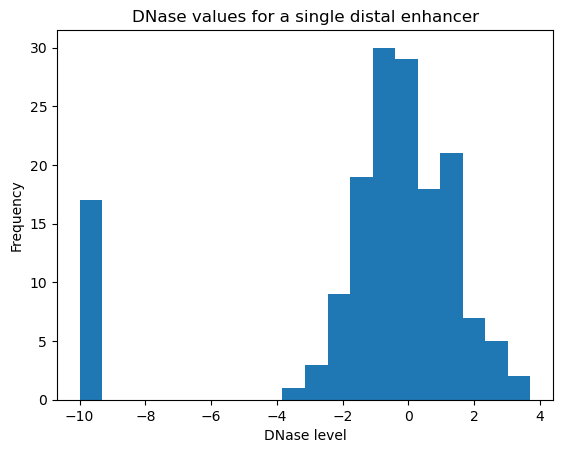

In [44]:
real_out = []
for i in out_list:
    real_out.append(i.item())
plt.hist(real_out, bins = 20)
plt.xlabel('DNase level')
plt.ylabel('Frequency')
plt.title('DNase values for a single distal enhancer')

Text(0.5, 1.0, 'ISM scores for the distal enhancer ccre')

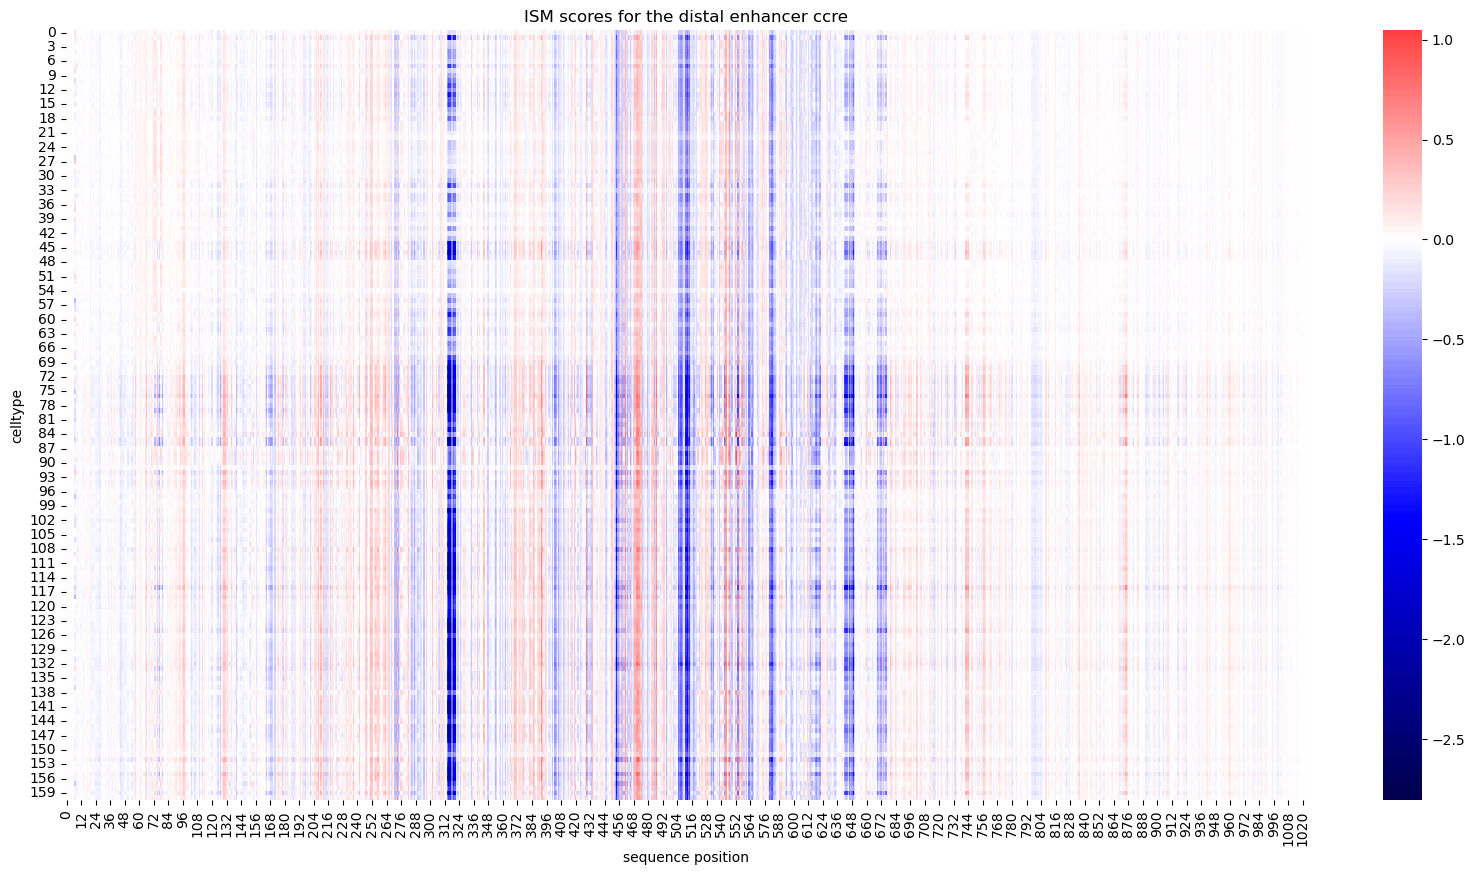

In [45]:
#important note, if it's starting form 5, that actually means the 6th ccre, the first one would indeed be 0!!
#let's now plot the ISM scores for this one
ccre6_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_5.npy').sum(axis = 0)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre6_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the distal enhancer ccre')

tensor([1.8475]) tensor([[-0.8663]], grad_fn=<AddmmBackward0>)


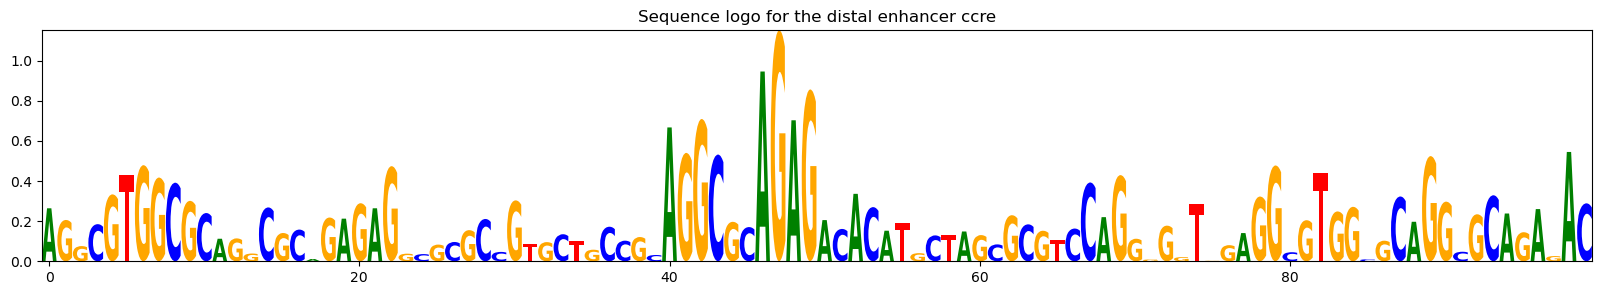

In [50]:
import logomaker
middle = ccre6_sum.shape[0]//2
a,b = util.dataset[161*2]
seq=util.dataset.tokenizer.decode(a)
#and predict vs output
temp,_ = util.backbone(a.unsqueeze(0))
out = util.decoder(temp)
print(b,out)
# middle = ccre2_sum.shape[0]//2
cut_seq = seq[middle-50+4:middle+50+4]
heights = np.mean(ccre6_sum[middle-50+4:middle+50+4], axis = 1)
logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq):
    logo_df.loc[i, symbol] = np.abs(heights)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here
plt.title('Sequence logo for the distal enhancer ccre')
# Show the plot with adjusted size
fig.show()


Text(0.5, 1.0, 'Actual vs predicted DNase values for the distal enhancer ccre')

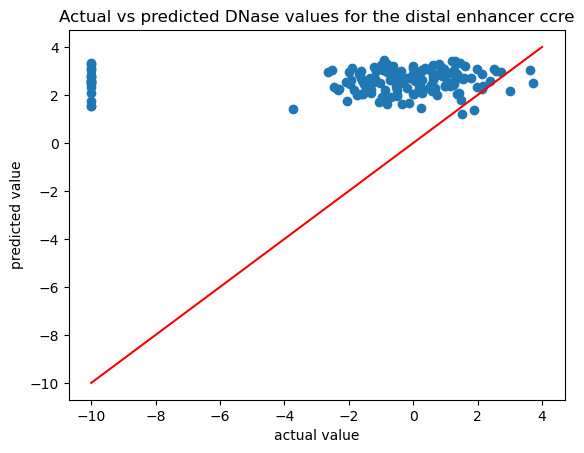

In [62]:
#can actually test results
# target, out = util.output_all(5*161) #for the 6th ccre
#now do a scatter plot
plt.scatter(target, out)
#and add the 1,1 line
plt.plot([-10,4],[-10,4], color = 'red')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Actual vs predicted DNase values for the distal enhancer ccre')

Text(0.5, 1.0, 'ISM scores for the distal enhancer, multitasking')

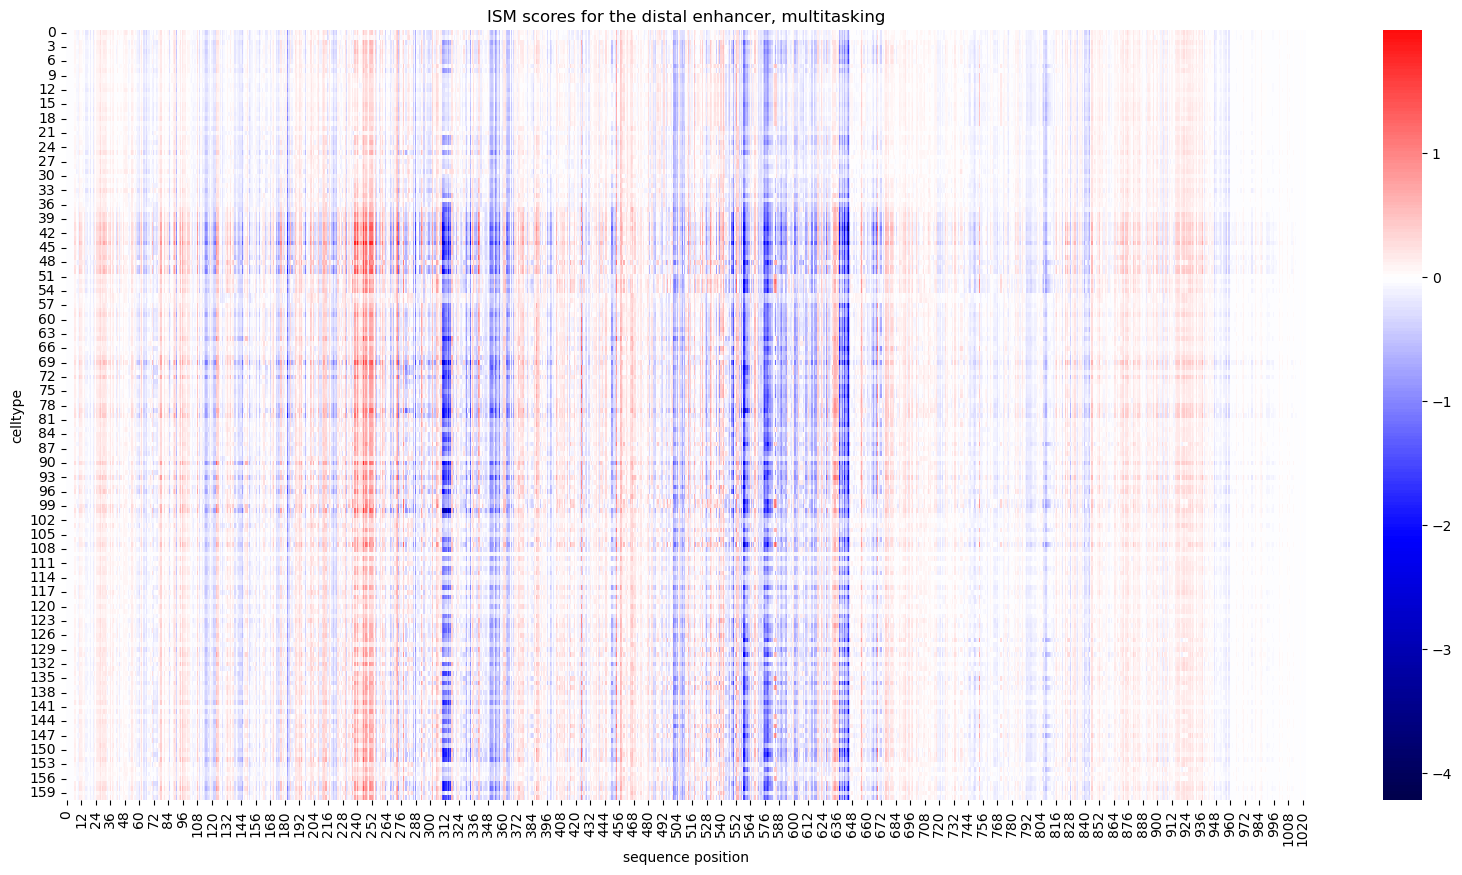

In [53]:
#and multitasking model
ccre6_all_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes5.npy').sum(axis = 0)
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ccre6_all_sum.T, cmap = 'seismic', center = 0)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the distal enhancer, multitasking')
#and now actual vs predicted


tensor(1.8475) tensor(-1.2936, grad_fn=<SelectBackward0>)


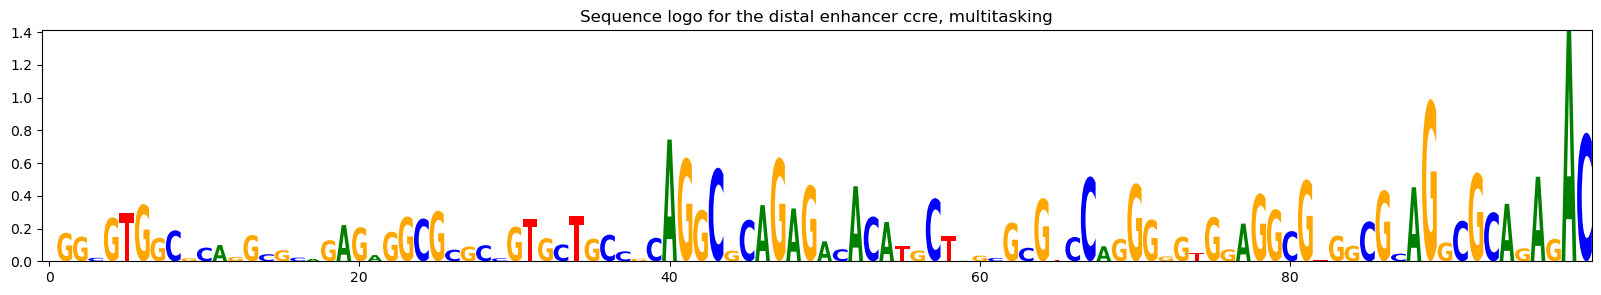

In [58]:
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
util_all = ISMUtils('DNase_allcelltypes', all_ckpt_path)
a,b = util_all.dataset[2]
seq_all = util_all.dataset.tokenizer.decode(a)
temp,_ = util_all.backbone(a.unsqueeze(0))
out = util_all.decoder(temp)
print(b[0],out[0,0]) #much worse prediction!
#and logo plot
middle = ccre6_all_sum.shape[0]//2
cut_seq_all = seq_all[middle-50:middle+50]
heights_all = np.mean(ccre6_all_sum[middle-50:middle+50], axis = 1)

logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq_all)), columns=list(set(cut_seq_all)), dtype=float)

# Fill the DataFrame with heights, converting heights to float if necessary
for i, symbol in enumerate(cut_seq_all):
    logo_df.loc[i, symbol] = np.abs(heights_all)[i]

# Generate the sequence logo
logo = logomaker.Logo(logo_df, color_scheme='classic')

fig = logo.ax.get_figure()
fig.set_size_inches(20, 3)  # Set the desired width and height here
plt.title('Sequence logo for the distal enhancer ccre, multitasking')
fig.show()

predicted output mean: 1.4683963060379028, actual output mean: -1.074790596961975


Text(0.5, 1.0, 'Actual vs predicted DNase values for the distal enhancer ccre, multitasking')

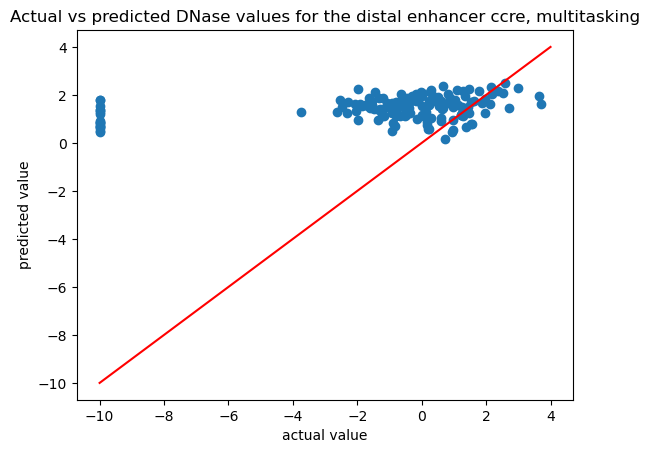

In [63]:
#and for multitasking
target, out = util_all.output_all(5) #for the 6th ccre
#now do a scatter plot
plt.scatter(target, out)
#and add the 1,1 line
plt.plot([-10,4],[-10,4], color = 'red')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Actual vs predicted DNase values for the distal enhancer ccre, multitasking')

# adding it all to the class

Need to give the class the ability to plot everything  
Ability to calculate ISM so can do that instead of load it, give it the option for cuda and stuff

In [10]:
#we will create a utility function for shap called shap_utils.py
#you define several attributes, and then it will load the data to be able to access the shap values

import torch 
import sys
import yaml 
sys.path.append('/data/leslie/sarthak/hyena/hyena-dna/')
from src.tasks.decoders import SequenceDecoder
from src.models.sequence.dna_embedding import DNAEmbeddingModel
from src.dataloaders.datasets.hg38_char_tokenizer import CharacterTokenizer
# import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logomaker

class ISMUtils():
    def __init__(self, model_type, ckpt_path, cfg = None, split = 'train', filter=True):
        type_list = ['ccre', 'DNase_ctst', 'DNase_allcelltypes', 'DNase']
        if model_type not in type_list:
            raise ValueError('Model type not recognized')
        self.mtype = model_type
        
        #check to see the type, and then load the right tokenizer, class and cfg
        if self.mtype == 'DNase':
            from src.dataloaders.datasets.DNase_dataset import DNaseDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase.yaml'
                
        elif self.mtype == 'DNase_allcelltypes':
            from src.dataloaders.datasets.DNase_allcelltypes import DNaseAllCellTypeDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase_allcelltypes.yaml'

        elif self.mtype == 'Dnase_ctst':
            from src.dataloaders.datasets.DNase_ctst_dataset import DNaseCtstDataset as DatasetClass
            self.tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )
            if cfg is None:
                cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase_ctst.yaml'

        else:
            raise ValueError('Model type not recognized')

        #now we load the model and dataset

        # self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.dataset = DatasetClass(max_length = 1024, split = split, tokenizer=self.tokenizer, rc_aug = False, tokenizer_name='char', add_eos='True', filter = filter)
        cfg = yaml.load(open(cfg, 'r'), Loader=yaml.FullLoader)
        
        train_cfg = cfg['train']  # grab section `train` section of config
        model_cfg = cfg['model_config']  # grab the `model` section of config
        d_output = train_cfg['d_output']
        backbone = DNAEmbeddingModel(**model_cfg)
        # backbone_skip = DNAEmbeddingModel(skip_embedding=True, **model_cfg)
        decoder = SequenceDecoder(model_cfg['d_model'], d_output=d_output, l_output=0, mode='pool')
        state_dict = torch.load(ckpt_path, map_location='cpu')  # has both backbone and decoder
        
        # loads model from ddp by removing prexix to single if necessary
        torch.nn.modules.utils.consume_prefix_in_state_dict_if_present(
            state_dict["state_dict"], "model."
        )

        model_state_dict = state_dict["state_dict"]

        # need to remove torchmetrics. to remove keys, need to convert to list first
        for key in list(model_state_dict.keys()):
            if "torchmetrics" in key:
                model_state_dict.pop(key)

        # the state_dict keys slightly mismatch from Lightning..., so we fix it here
        decoder_state_dict = {}
        decoder_state_dict['output_transform.weight'] = model_state_dict.pop('decoder.0.output_transform.weight')
        decoder_state_dict['output_transform.bias'] = model_state_dict.pop('decoder.0.output_transform.bias')

        #now adjust the backbone if needed
        if self.mtype == 'DNase':
            embedding1 = torch.nn.Embedding(20, 128)
            # embedding2 = torch.nn.Embedding(20, 128)
            backbone.backbone.embeddings.word_embeddings = embedding1 #again a hack
            # backbone_skip.backbone.embeddings.word_embeddings = embedding2 #again a hack

        # now actually load the state dict to the decoder and backbone separately
        decoder.load_state_dict(decoder_state_dict, strict=True)
        backbone.load_state_dict(model_state_dict, strict=True)

        self.backbone = backbone.eval()
        self.decoder = decoder.eval()

        self.bed = pd.read_csv('/data/leslie/sarthak/data/GRCh38-cCREs.bed', header=None, delimiter='\t').to_numpy()
        self.middle = 1023//2 #just used for the logo plots

    def var(self, idx):
        #This is the idx for the ccre, so if you want it for ccre 2 it's just idx == 2. Not 161*idx
        seq_idx = idx
        cCRE_id = self.dataset.array[seq_idx][0] #get the id from the array
        row = self.dataset.cCRE_dict[cCRE_id]
        #now we can calculate the variance using this data
        # print(np.var(dnase_filtered[row,:])) #identical
        
        return np.var(self.dataset.cell_dnase_levels[row,:])

    def output(self,idx):
        #given the index, this finds the associated output (single value)
        a,b = self.dataset[idx]
        temp,_ = self.backbone(a.unsqueeze(0))
        out = self.decoder(temp)

        if self.mtype == 'DNase':
            print(f'predicted output: {out}, actual output: {b}')
            return b, out

        elif self.mtype == 'DNase_allcelltypes':
            print(f'predicted output: {out[0,0]}, actual output: {b[0]}')
            return b[0], out[0,0]

    def output_all(self,idx):
        #given the index, this finds the associated output (all values averaged across the cell types for a singel ccre)
        #if it's DNase, then we need to do it for all the cell types, here the input idx should be 161 times any number
        if self.mtype == 'DNase':
            #first check to make sure idx is divisible by 161
            if idx % 161 != 0:
                raise ValueError('Index not divisible by 161')
            out_list = []
            target_list = []
            for i in range(161):
                a,b = self.dataset[idx+i]
                temp,_ = self.backbone(a.unsqueeze(0))
                out = self.decoder(temp)
                out_list.append(out.item())
                target_list.append(b.item())
            out = np.mean(out_list)
            print(f'predicted output mean: {out}, actual output mean: {np.mean(target_list)}')
            #but return the whole lists
            return np.array(target_list), np.array(out_list)

        if self.mtype == 'DNase_allcelltypes':
            a,b = self.dataset[idx]
            temp,_ = self.backbone(a.unsqueeze(0))
            out = self.decoder(temp)
            print(f'predicted output mean: {torch.mean(out)}, actual output mean: {torch.mean(b)}')
            return b.detach().numpy(), out.detach().numpy()

    def plot_singlecelltype(self, data, celltype = 0):
        #given the index, this finds the associated output (single value)
        #we can either take in the actual data, or the ccre number
        #actual data must be formatted the same as the saved data
        if type(data) == int:
            data_loaded = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_{data}.npy')
        elif type(data) == np.ndarray: #you can also just give it the data and then it doesn't need to load it
            data_loaded = data
        fig, ax = plt.subplots(1,1, figsize = (20,10))
        sns.heatmap(data_loaded[:,:,celltype], cmap = 'seismic', center = 0)
        plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
        plt.xlabel('sequence position')
        plt.title(f'ISM scores for the {celltype} cell type of the {data} ccre')
        plt.show()

    def plot_all(self,data):
        #once again can give the ccre or the actual data
        if type(data) == int:
            data_loaded = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_{data}.npy')
        elif type(data) == np.ndarray:
            data_loaded = data
        fig, ax = plt.subplots(1,1, figsize = (20,10))
        sns.heatmap(data_loaded.sum(axis = 0).T, cmap = 'seismic', center = 0)
        plt.ylabel('celltype')
        plt.xlabel('sequence position')
        plt.title('ISM scores for all cell types single ccre')
        plt.show()

    def default_heights(self,data):
        #it will sum across the nucelotides and average over the celltypes
        if type(data) == int:
            data_loaded = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_{data}.npy')
        elif type(data) == np.ndarray:
            data_loaded = data
        return data_loaded.sum(axis = 0).mean(axis = 1)

    def logoplot(self,ccre,heights = None, startend=None): #potentially we add the title as an input into the model
        #so given the ccre number and the heights, this will plot the logo plot
        #note ccre should be the ccre number regardless of the model type
        #heights must be provided, is usually the sum across the axis=1 for the data that is used for plot_all
        if self.mtype == 'DNase':
            ccre = 161*ccre
        a,b = self.dataset[ccre]
        seq=self.dataset.tokenizer.decode(a)
        if startend is None and self.mtype == 'DNase':
            start = self.middle-50+4
            end = self.middle+50+4
        elif startend is None and self.mtype == 'DNase_allcelltypes':
            start = self.middle-50
            end = self.middle+50
        else:
            start = startend[0]
            end = startend[1]

        #now we can define cut_seq
        cut_seq = seq[start:end]
                    
        if heights is None:
            raise ValueError('Need to provide heights')

        #now we define cut heights
        heights = heights[start:end]        
        logo_df = pd.DataFrame(0, index=np.arange(len(cut_seq)), columns=list(set(cut_seq)), dtype=float)

        # Fill the DataFrame with heights, converting heights to float if necessary
        for i, symbol in enumerate(cut_seq):
            logo_df.loc[i, symbol] = np.abs(heights)[i]

        # Generate the sequence logo
        logo = logomaker.Logo(logo_df, color_scheme='classic')

        fig = logo.ax.get_figure()
        fig.set_size_inches(20, 3)  # Set the desired width and height here
        plt.title('Sequence logo')
        fig.show()
    
    def find_ccre_type(self, idx):
        #this function will use the ccre id to find the specific type
        #first get the id
        if self.mtype == 'DNase':        
            seq_idx = int(idx/self.dataset.cell_types)
        else:
            seq_idx = idx
        ccre_id = self.dataset.array[seq_idx][0]
        line = np.where(self.bed[:,3] == ccre_id)
        return self.bed[line[0][0], -1]

In [11]:
# testing this new class
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
ism = ISMUtils('DNase', ckpt_path)

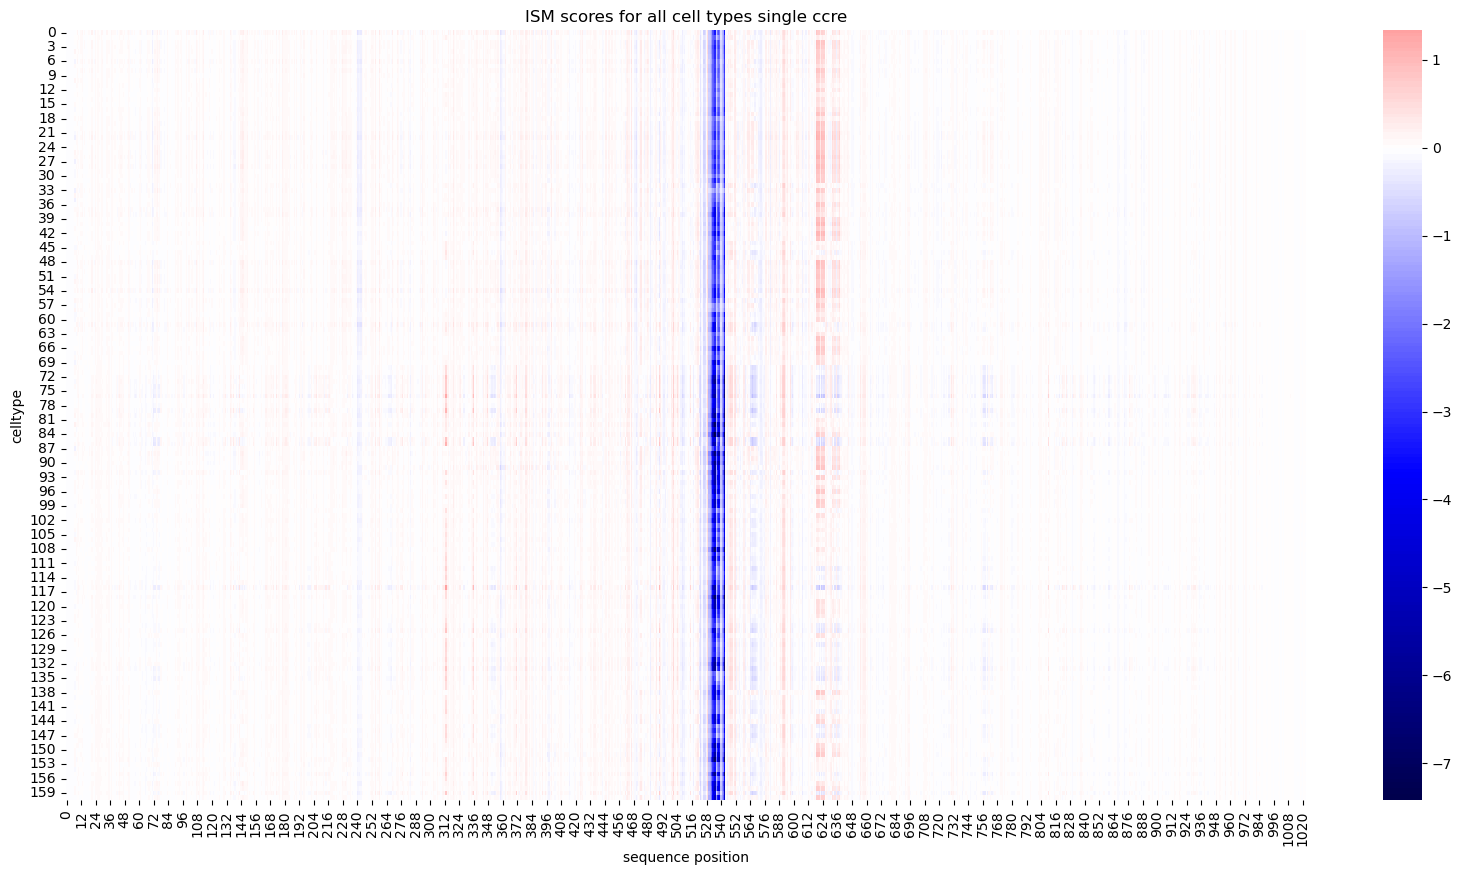

In [3]:
#now let's try this
ism.plot_all(0)
#perfectly identical!!

In [4]:
data = 0
data_loaded = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_{data}.npy')
print(data_loaded.shape)

(4, 1023, 161)


In [7]:
#try default heights
a = ism.default_heights(0)
print(a.shape)

(1023,)


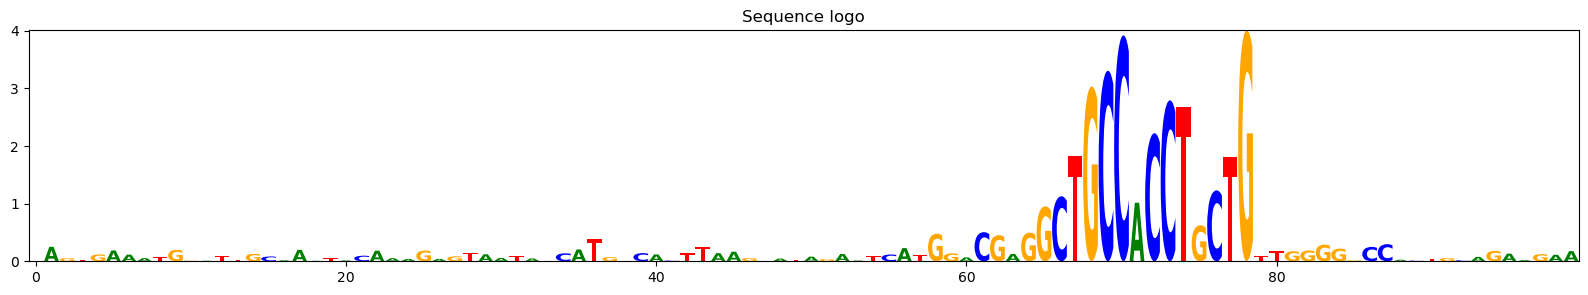

In [13]:
# import logomaker
ism.logoplot(0,a)

Text(0.5, 1.0, 'ISM scores for the distal enhancer ccre')

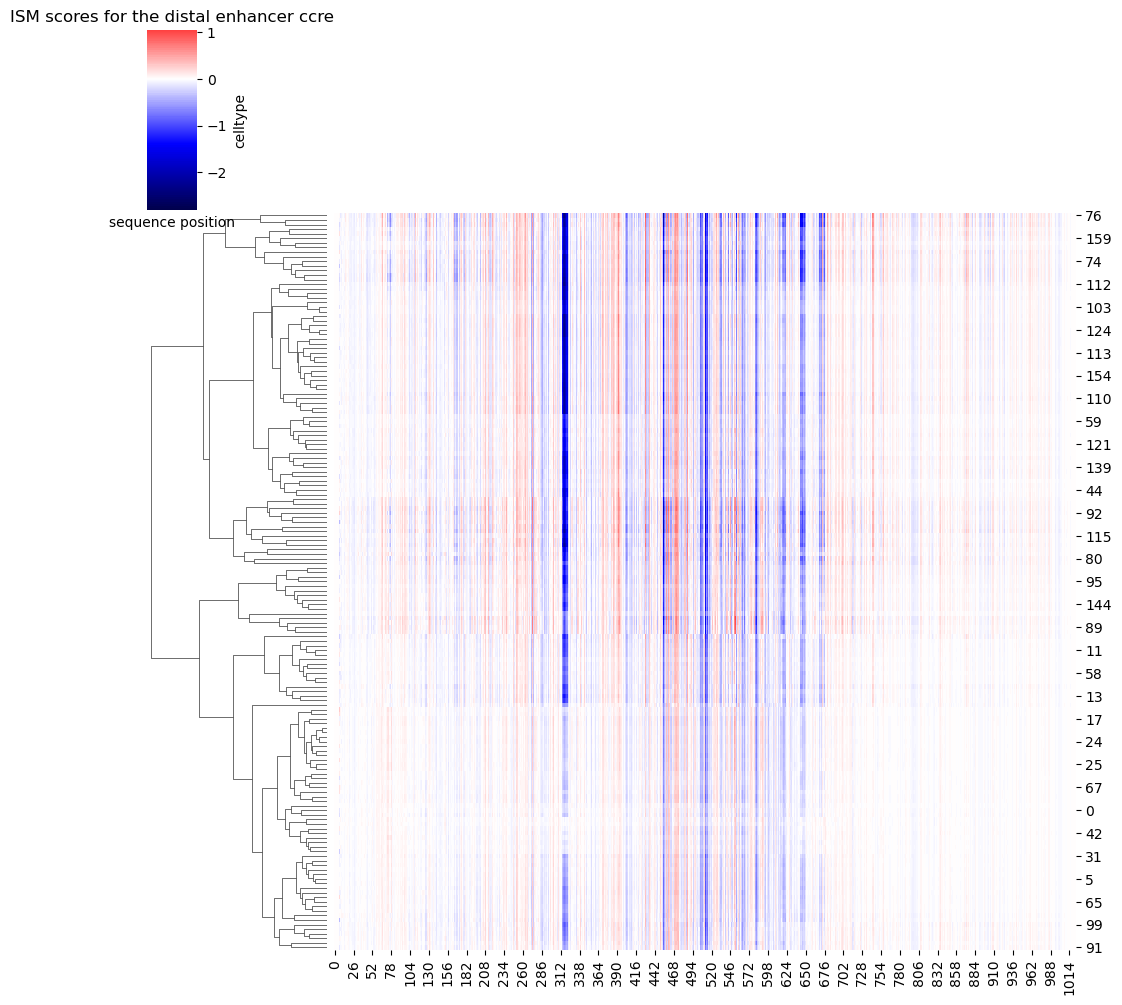

In [17]:
#and now cluster across rows
ccre6_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_5.npy').sum(axis = 0)
# fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.clustermap(ccre6_sum.T, cmap = 'seismic', center = 0,col_cluster=False)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the distal enhancer ccre')

Text(0.5, 1.0, 'ISM scores for the distal enhancer ccre')

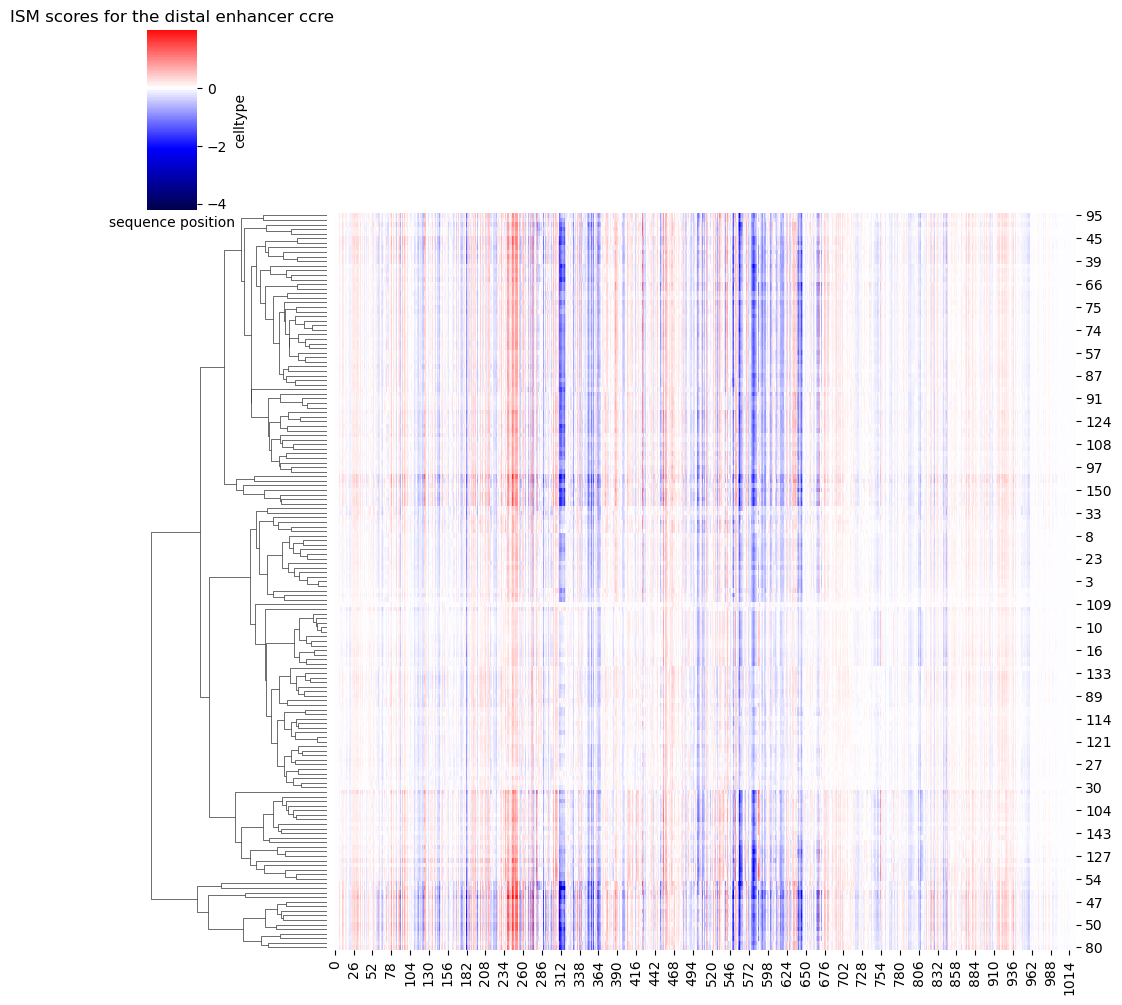

In [19]:
ccre6_sum = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes5.npy').sum(axis = 0)
# fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.clustermap(ccre6_sum.T, cmap = 'seismic', center = 0,col_cluster=False)
plt.ylabel('celltype')
plt.xlabel('sequence position')
plt.title('ISM scores for the distal enhancer ccre')